# Introducció

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

C:\Users\David\AppData\Local\Temp\ipykernel_9108\1999315763.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(axis='x', b=False)


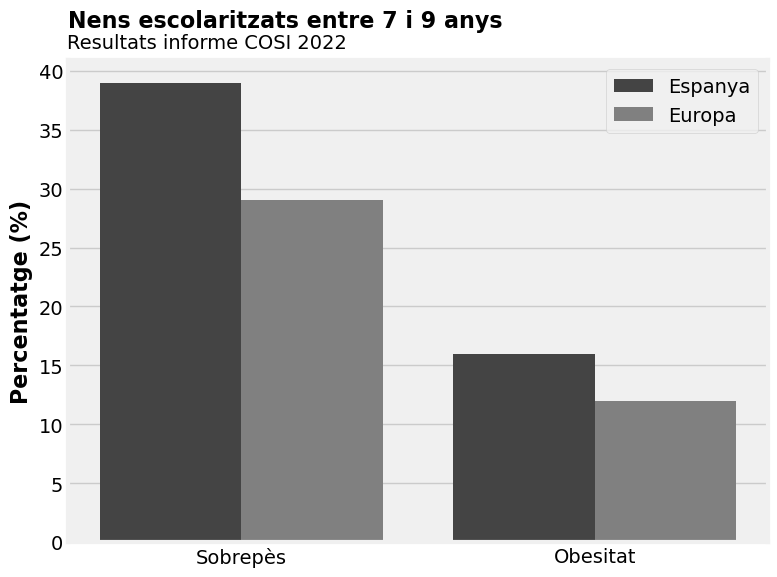

In [56]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8,6))
x = ['Obesitat', 'Sobrepes']
width=0.4
spain = [39,16]
europe = [29,12]
x_indices = np.arange(2)
ax.bar(x_indices,spain,color="#444444",width=width, label='Espanya')
ax.bar(x_indices+width,europe,color="gray",width=width, label='Europa')
ax.legend()
#sns.countplot(x=data['MissingValues'], color='gray')
ax.set_xticks(ticks=[0.2,1.2], labels=['Sobrepès','Obesitat'])
ax.set_title("Nens escolaritzats entre 7 i 9 anys",fontweight='bold',fontsize=16,y=1.05,loc='left')
plt.text(0.098, 0.9, 'Resultats informe COSI 2022', fontsize=14, transform=plt.gcf().transFigure)
ax.set_ylabel("Percentatge (%)",fontweight='bold',fontsize=16)
plt.grid(axis='x', b=False)
plt.tight_layout()
fig.patch.set_facecolor('white')
#fig.savefig('valors_missing.png',dpi=300)
plt.show()

Carrego les dades SENSE imputació de Missing values

In [2]:
data=pd.read_excel('Experiment_5_Final_missing.xlsx')

In [3]:
data['MissingValues'] = data.isna().sum(axis=1)
data['MissingValues'].value_counts()

0     101
1      63
4      42
2      38
3      37
5      21
10     18
6      15
7      11
9      10
8       9
11      7
12      6
14      3
16      2
13      1
21      1
15      1
Name: MissingValues, dtype: int64

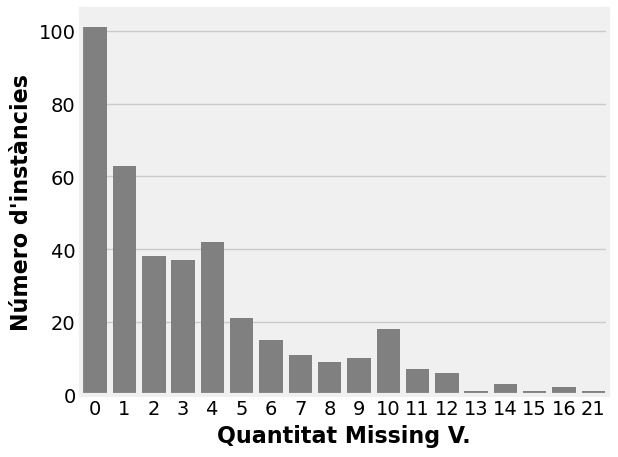

In [4]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
sns.countplot(x=data['MissingValues'], color='gray')
ax.set_xlabel("Quantitat Missing V.",fontweight='bold',fontsize=16)
ax.set_ylabel("Número d'instàncies",fontweight='bold',fontsize=16)
plt.tight_layout()
fig.patch.set_facecolor('white')
fig.savefig('valors_missing.png',dpi=300)
plt.show()

In [5]:
data.drop(columns=['MissingValues'], inplace=True)

In [6]:
data['OBE1TY_5Y_grup'].value_counts()

0    332
1     54
Name: OBE1TY_5Y_grup, dtype: int64

In [7]:
data.head()

,AgeM,talla_EM,tabac_preM,alcohol_preM,BWM,Parity_EM,BMIpre_mare,AgeP,HeightP,BMI_P,...,mesos alim_mat_nen,Pes 2m_nen,Alçada 2m_nen,Pes 4m_nen,Alçada 4m_nen,pes 6m_nen,alçada 6m_nen,pes 12m_nen,alçada 12m_nen,OBE1TY_5Y_grup
0,35,160.0,0.0,0.0,NaN,1.0,26.562500,46.0,178.0,27.12,...,8.0,5650.0,57.0,7140.0,62.5,7630.0,67.0,9750.0,73.0,1
1,19,164.0,1.0,0.0,2.0,1.0,23.795360,26.0,173.0,24.75,...,2.0,5110.0,56.0,6390.0,61.0,7520.0,66.0,9380.0,74.0,0
2,30,170.0,0.0,0.0,3.0,1.0,29.065744,44.0,178.0,25.56,...,3.0,5240.0,59.0,7110.0,68.0,8160.0,70.0,9880.0,78.5,0
3,36,163.0,0.0,0.0,3.0,2.0,21.453574,42.0,178.0,30.93,...,9.0,5220.0,58.0,7070.0,64.0,8210.0,68.0,11440.0,77.0,1
4,32,165.0,0.0,0.0,3.0,1.0,20.752984,38.0,182.0,23.25,...,5.0,NaN,NaN,NaN,NaN,7280.0,67.0,9200.0,74.0,0


In [8]:
instances, features = data.shape

In [9]:
data.describe() #les mitjanes no es corresponen amb els valors imputats a l'excel

,AgeM,talla_EM,tabac_preM,alcohol_preM,BWM,Parity_EM,BMIpre_mare,AgeP,HeightP,BMI_P,...,mesos alim_mat_nen,Pes 2m_nen,Alçada 2m_nen,Pes 4m_nen,Alçada 4m_nen,pes 6m_nen,alçada 6m_nen,pes 12m_nen,alçada 12m_nen,OBE1TY_5Y_grup
count,386.000000,386.000000,350.000000,350.000000,321.000000,375.000000,377.000000,349.000000,337.000000,330.000000,...,268.000000,330.000000,328.000000,317.000000,316.000000,341.000000,341.000000,343.00000,343.000000,386.000000
mean,31.310881,162.779016,0.260000,0.274286,2.735202,1.501333,23.999666,33.785100,176.102374,26.241109,...,7.190299,5281.742424,57.504878,6750.488959,63.331013,7752.536657,67.075660,9658.03207,75.226239,0.139896
std,4.221988,6.221467,0.439262,0.446792,0.608513,0.500666,4.250751,5.172563,6.602380,3.535894,...,7.743378,644.732510,2.331090,885.283065,2.406853,985.942414,2.319209,1147.25613,2.675689,0.347330
min,19.000000,145.100000,0.000000,0.000000,1.000000,1.000000,17.625381,12.000000,160.000000,19.377163,...,0.000000,2540.000000,48.000000,3960.000000,55.000000,5000.000000,61.000000,6680.00000,67.000000,0.000000
25%,29.000000,159.000000,0.000000,0.000000,2.000000,1.000000,20.972380,31.000000,171.500000,23.820000,...,2.000000,4890.000000,56.000000,6170.000000,62.000000,7070.000000,66.000000,8890.00000,73.500000,0.000000
50%,31.500000,163.000000,0.000000,0.000000,3.000000,2.000000,22.864375,34.000000,176.000000,25.851787,...,5.500000,5255.000000,57.500000,6720.000000,63.450000,7650.000000,67.000000,9580.00000,75.000000,0.000000
75%,34.000000,167.000000,1.000000,1.000000,3.000000,2.000000,25.971918,37.000000,180.000000,28.176309,...,9.000000,5620.000000,59.000000,7250.000000,65.000000,8360.000000,68.500000,10315.00000,77.000000,0.000000
max,43.000000,182.000000,1.000000,1.000000,4.000000,2.000000,40.691306,51.000000,193.000000,39.867216,...,60.000000,7600.000000,69.000000,10500.000000,70.000000,12220.000000,75.000000,15860.00000,83.000000,1.000000


In [10]:
#guardem en una llista les columnes que contenen missing values
cols_missing=[]
mis=0
for col in data.columns:
  if len(data[col].isna().value_counts().index)==2:
    mis+=data[col].isna().value_counts()[1]
    print(f'Columna {col}: {data[col].isna().value_counts()[1]} NaN')
    cols_missing.append(col)

print()
print(f'Número de columnes amb NaN: {len(cols_missing)}')
print()
print(f'Total missing values: {mis}')

Columna tabac_preM: 36 NaN
Columna alcohol_preM: 36 NaN
Columna BWM: 65 NaN
Columna Parity_EM: 11 NaN
Columna BMIpre_mare: 9 NaN
Columna AgeP: 37 NaN
Columna HeightP: 49 NaN
Columna BMI_P: 56 NaN
Columna SmokingP: 48 NaN
Columna AlcoholP: 46 NaN
Columna BWP: 86 NaN
Columna BMI_2_EM: 27 NaN
Columna tas_2_EM: 28 NaN
Columna tad_2_EM: 28 NaN
Columna BMI_3_EM: 31 NaN
Columna tas_3_EM: 39 NaN
Columna tad_3_EM: 40 NaN
Columna tabac_gestM: 29 NaN
Columna Height_B: 1 NaN
Columna pes placenta: 55 NaN
Columna mesos alim_mat_nen: 118 NaN
Columna Pes 2m_nen: 56 NaN
Columna Alçada 2m_nen: 58 NaN
Columna Pes 4m_nen: 69 NaN
Columna Alçada 4m_nen: 70 NaN
Columna pes 6m_nen: 45 NaN
Columna alçada 6m_nen: 45 NaN
Columna pes 12m_nen: 43 NaN
Columna alçada 12m_nen: 43 NaN

Número de columnes amb NaN: 29

Total missing values: 1304


In [11]:
#imprimim la mitjana de cada variable que conté missing values
for col in cols_missing:
  print(f'{col}: {round(data[col].mean(),2)}')

tabac_preM: 0.26
alcohol_preM: 0.27
BWM: 2.74
Parity_EM: 1.5
BMIpre_mare: 24.0
AgeP: 33.79
HeightP: 176.1
BMI_P: 26.24
SmokingP: 0.34
AlcoholP: 0.63
BWP: 3.01
BMI_2_EM: 26.95
tas_2_EM: 113.52
tad_2_EM: 66.26
BMI_3_EM: 28.53
tas_3_EM: 115.79
tad_3_EM: 70.55
tabac_gestM: 0.16
Height_B: 49.47
pes placenta: 584.87
mesos alim_mat_nen: 7.19
Pes 2m_nen: 5281.74
Alçada 2m_nen: 57.5
Pes 4m_nen: 6750.49
Alçada 4m_nen: 63.33
pes 6m_nen: 7752.54
alçada 6m_nen: 67.08
pes 12m_nen: 9658.03
alçada 12m_nen: 75.23


In [12]:
data.dropna().shape #gairebé el 75% de les instàncies contenen missing values

(101, 36)

# Missing values numèrics

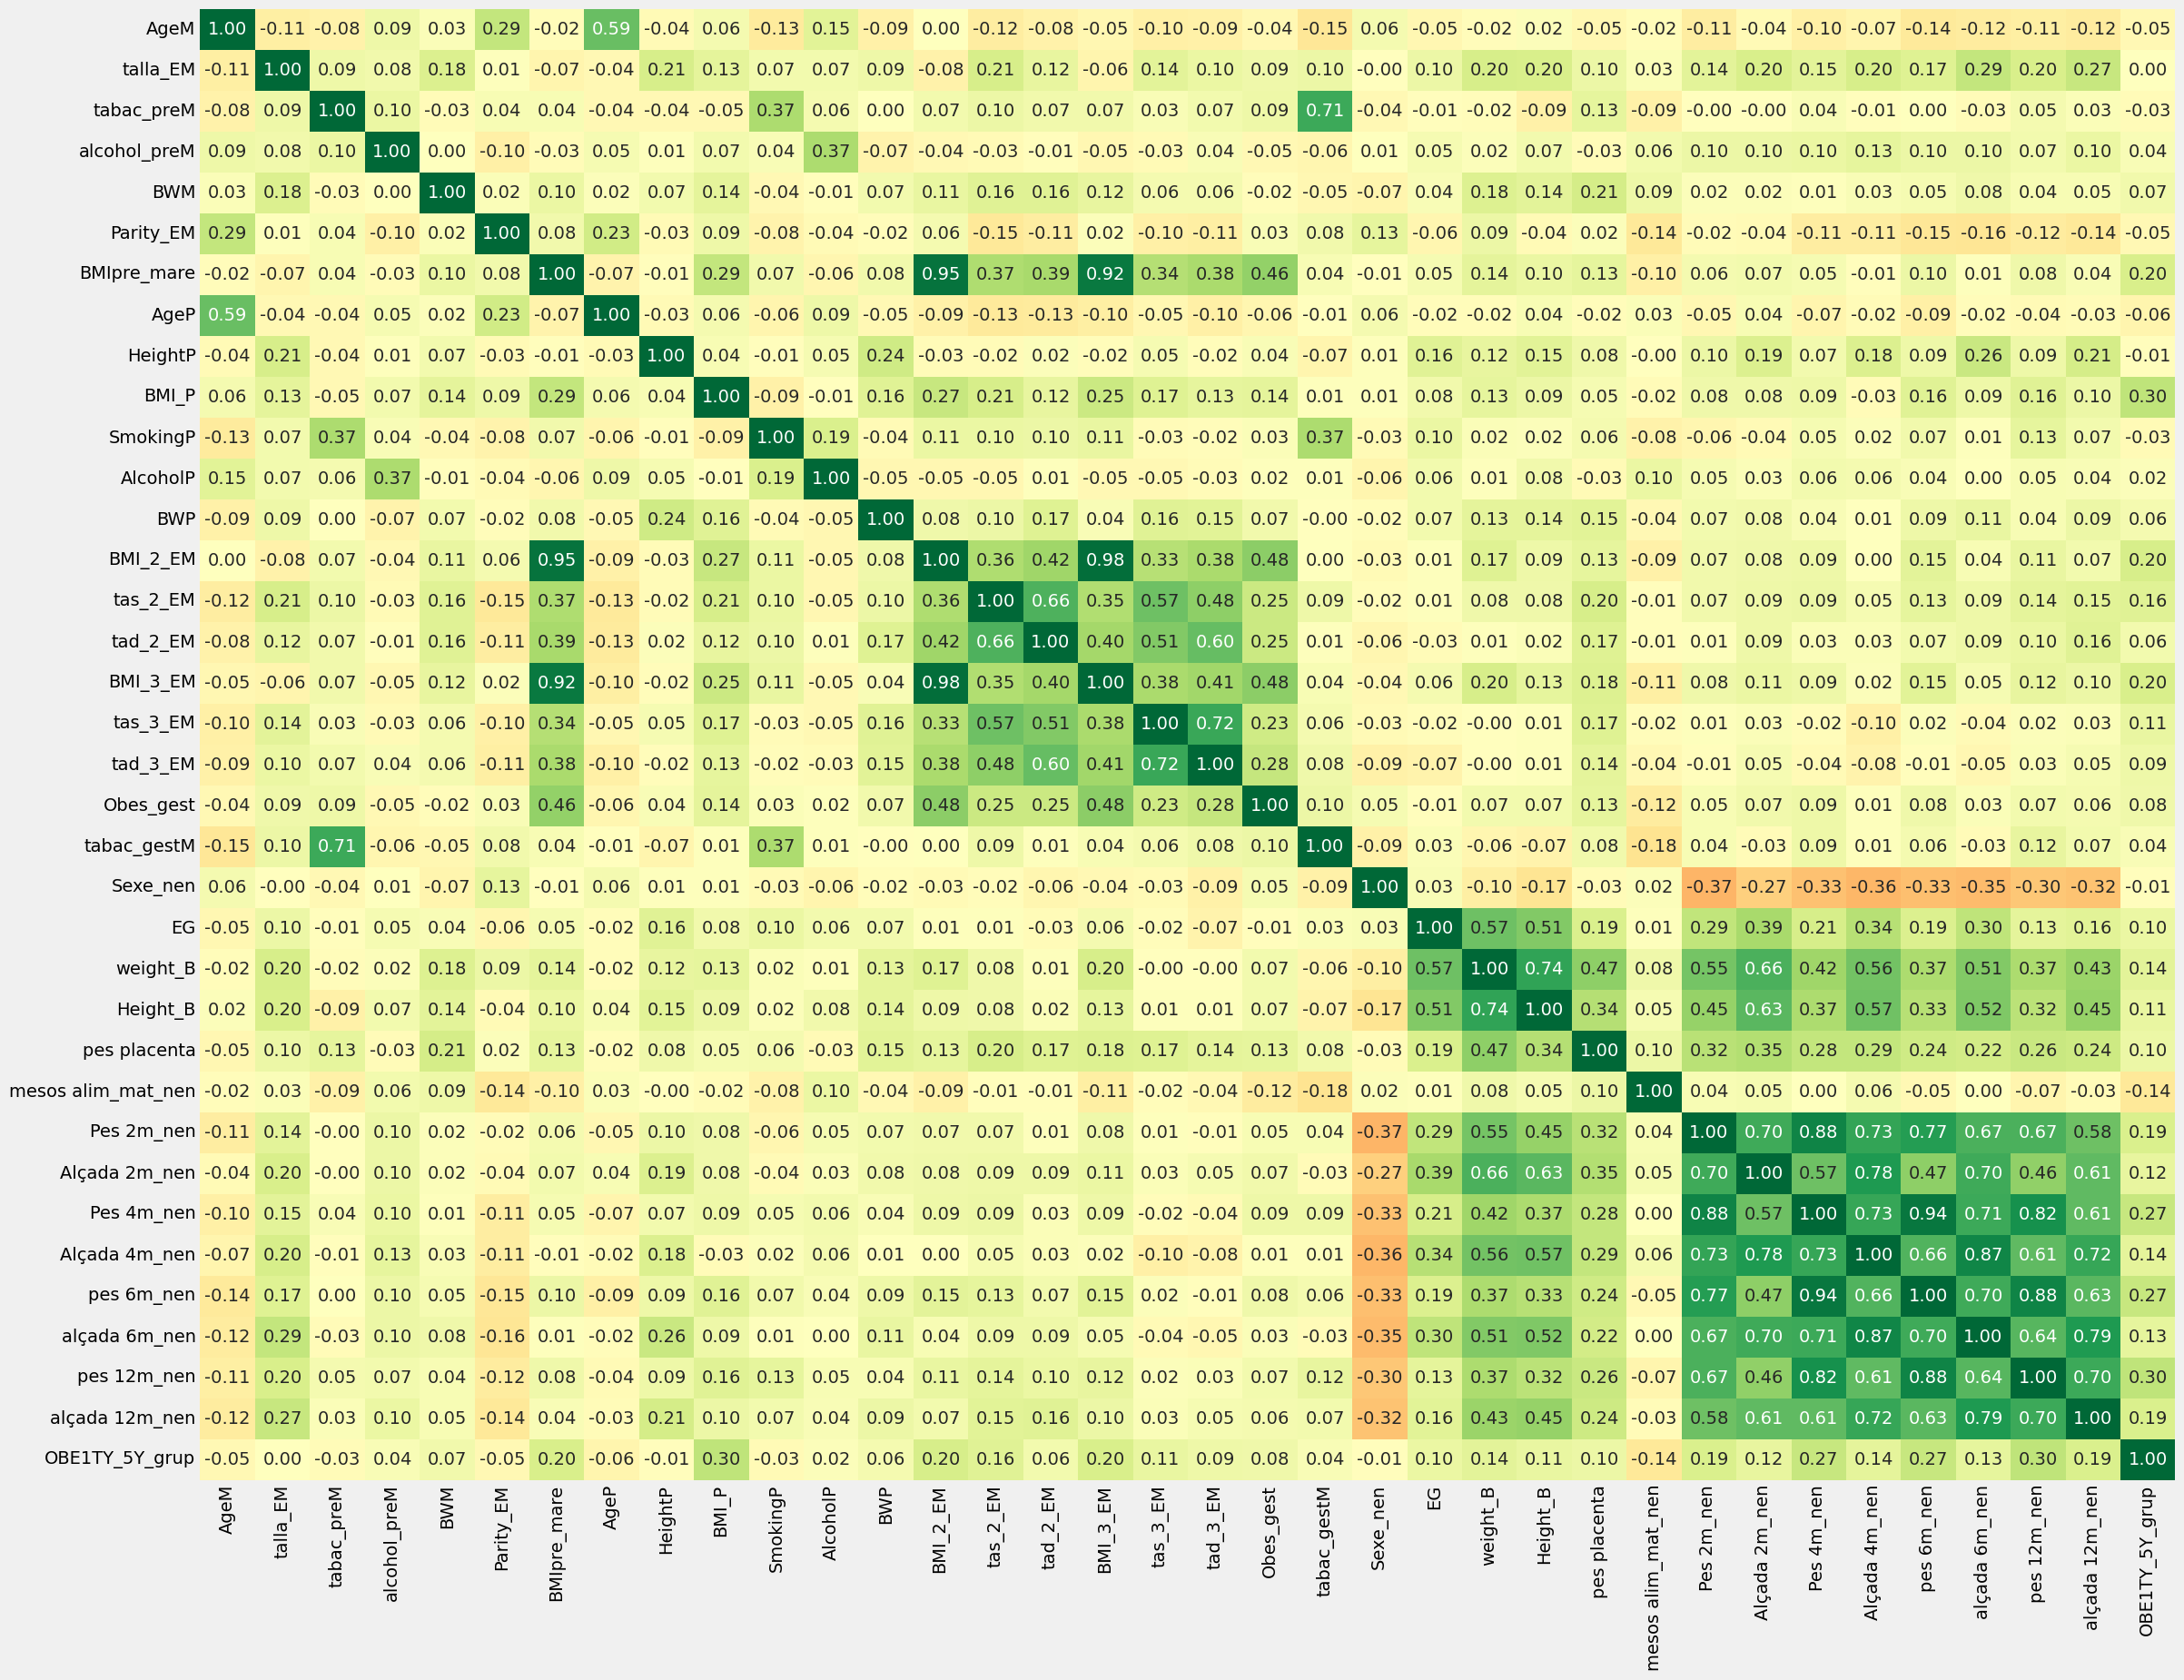

In [13]:
plt.subplots(figsize=(25,20))
sns.heatmap(data.corr(),annot=True, cmap="RdYlGn", fmt = '0.2f', vmin=-1, vmax=1, cbar=False);

El conjunt de variables {weight_B, Height_B, pes placenta, Pes 2m_nen, Alçada 2m_nen, Pes 4m_nen, Alçada 4m_nen, pes 6m_nen, alçada 6m_nen, pes 12m_nen, alçada 12m_nen} està molt correlacionat podem preedir una variable que sigui missing a partir de la resta. 

In [14]:
numeric_nado=['weight_B','Height_B','pes placenta','Pes 2m_nen','Alçada 2m_nen','Pes 4m_nen','Alçada 4m_nen','pes 6m_nen','alçada 6m_nen','pes 12m_nen','alçada 12m_nen']
data_nado=data[numeric_nado]

In [15]:
data_nado.columns=['weight_B','Height_B','pes_placenta','Pes_2m_nen','Alçada_2m_nen','Pes_4m_nen','Alçada_4m_nen','pes_6m_nen','alçada_6m_nen','pes_12m_nen','alçada_12m_nen']

In [16]:
data_nado.head()

,weight_B,Height_B,pes_placenta,Pes_2m_nen,Alçada_2m_nen,Pes_4m_nen,Alçada_4m_nen,pes_6m_nen,alçada_6m_nen,pes_12m_nen,alçada_12m_nen
0,3240,48.0,480.0,5650.0,57.0,7140.0,62.5,7630.0,67.0,9750.0,73.0
1,3180,48.0,640.0,5110.0,56.0,6390.0,61.0,7520.0,66.0,9380.0,74.0
2,3590,53.0,520.0,5240.0,59.0,7110.0,68.0,8160.0,70.0,9880.0,78.5
3,3600,50.0,560.0,5220.0,58.0,7070.0,64.0,8210.0,68.0,11440.0,77.0
4,3550,51.0,NaN,NaN,NaN,NaN,NaN,7280.0,67.0,9200.0,74.0


In [17]:
data_nado.shape

(386, 11)

In [18]:
data_nado.dropna().shape

(221, 11)

Exemple a mode d'ilustració: Single linear regression "alçada_12m_nen ~ pes_placenta"

In [19]:
model = ols(formula="alçada_12m_nen ~ pes_placenta", data=data_nado[['pes_placenta','alçada_12m_nen']].dropna()).fit()

In [20]:
print(model.params)

Intercept       72.212915
pes_placenta     0.005125
dtype: float64


In [21]:
intercept,coef=model.params

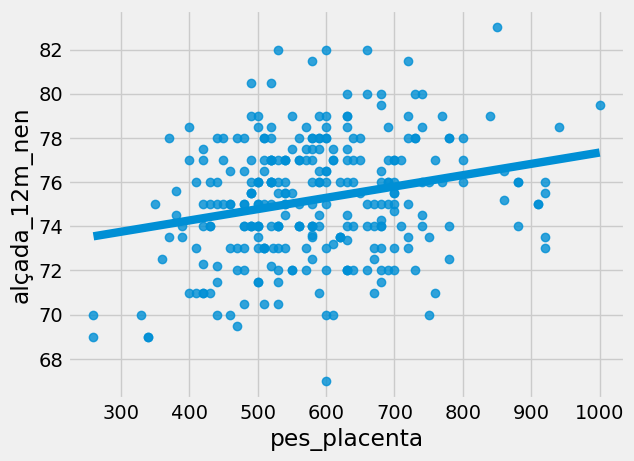

In [22]:
plt.style.use('fivethirtyeight')
sns.regplot(x='pes_placenta',y='alçada_12m_nen',data=data_nado,ci=None)
plt.show()

In [23]:
prediction=intercept+coef*300
round(prediction,2)

73.75

Amb aquesta regressió, tot i que no és molt acurada ja que només hi ha una variable explicativa, imputarem valors entre **73 i 77**. Mentre que la mitjana imputada a l'excel per **alçada 12m_nen** és de **66.5**. En els casos on tinguem més variables explicatives augmentarem la precisió de les imputacions.

Exemple regressió multivariable

In [24]:
df2=data_nado[['Pes_2m_nen', 'Alçada_2m_nen','alçada_12m_nen']].dropna()

In [25]:
df2.head()

,Pes_2m_nen,Alçada_2m_nen,alçada_12m_nen
0,5650.0,57.0,73.0
1,5110.0,56.0,74.0
2,5240.0,59.0,78.5
3,5220.0,58.0,77.0
5,4140.0,54.5,72.0


In [26]:
dependent_variable = 'alçada_12m_nen'
independent_variables = [col for col in df2.columns if col != dependent_variable]
print(independent_variables)
formula = f'{dependent_variable} ~ {"+".join(independent_variables)}'
print(formula)
model=ols(formula=formula, data=df2).fit()

['Pes_2m_nen', 'Alçada_2m_nen']
alçada_12m_nen ~ Pes_2m_nen+Alçada_2m_nen


In [27]:
print(model.params)

Intercept        42.806370
Pes_2m_nen        0.001220
Alçada_2m_nen     0.453074
dtype: float64


In [28]:
round(np.array(model.params)[0]+np.dot(np.array(model.params)[1:],np.array([5650,57])),2)#predicció 1era instància

75.52

Una vegada vist l'exemple de com funciona el procés d'imputació per regressió procedim amb les imputacions.

Cal crear un mapping perque les columnes originals contenen espais que no són acceptats per la formula:

In [29]:
d={'Height_B':'Height_B',
   'pes_placenta':'pes placenta',
   'Pes_2m_nen':'Pes 2m_nen',
   'Alçada_2m_nen':'Alçada 2m_nen',
   'Pes_4m_nen':'Pes 4m_nen',
   'Alçada_4m_nen':'Alçada 4m_nen',
   'pes_6m_nen':'pes 6m_nen',
   'alçada_6m_nen':'alçada 6m_nen',
   'pes_12m_nen':'pes 12m_nen',
   'alçada_12m_nen':'alçada 12m_nen',}

Procedim a fer la imputació:

In [30]:
var=['weight_B','Height_B','pes placenta','Pes 2m_nen','Alçada 2m_nen','Pes 4m_nen','Alçada 4m_nen','pes 6m_nen','alçada 6m_nen','pes 12m_nen','alçada 12m_nen']
var_missing=['Height_B','pes_placenta','Pes_2m_nen','Alçada_2m_nen','Pes_4m_nen','Alçada_4m_nen','pes_6m_nen','alçada_6m_nen','pes_12m_nen','alçada_12m_nen']
data_copy = data.copy()  # copia del dataset original
subset=data_copy[var]
subset.columns=['weight_B','Height_B','pes_placenta','Pes_2m_nen','Alçada_2m_nen','Pes_4m_nen','Alçada_4m_nen','pes_6m_nen','alçada_6m_nen','pes_12m_nen','alçada_12m_nen']
i=0
for dependent_variable in var_missing:  # iterem entre totes les variables que contenen NaN
  for idx,row in subset.iterrows():  # iterem entre totes les rows (instàncies) del dataframe
    if np.isnan(row[dependent_variable]):  # si la variable es missing
      non_missing=list(row[row.notna()].index.values)  # list de les variables NO MISSING de la row
      formula = f'{dependent_variable} ~ {"+".join(non_missing)}'  # Creem la formula (Var dependent ~ Var independents)
      predictors = row[non_missing].values  # numpyarray: variables independents que no són missing en la instància
      non_missing.append(dependent_variable)  # afegim la variable dependent a la llista
      df = subset[non_missing].dropna()  # Creem un subset del DF amb les rows que contenen tots els valors de la formula
      model = ols(formula=formula, data=df).fit()  # Entrenem el model: dependent_variable ~ f(non_missing)
      prediccio = round(np.array(model.params)[0]+np.dot(np.array(model.params)[1:],predictors))
      # predicció de la variable missing, utilitzant els predictors
      data.loc[idx,d[dependent_variable]] = prediccio  # imputem la predicció al dataset original utilitzant el mapping
      i+=1
print(f"Total d'imputacions realitzades: {i}")

Total d'imputacions realitzades: 485


In [31]:
cols_missing=[]
mis=0
for col in data.columns:
  if len(data[col].isna().value_counts().index)==2:
    mis+=data[col].isna().value_counts()[1]
    print(f'Columna {col}: {data[col].isna().value_counts()[1]} NaN')
    cols_missing.append(col)

print()
print(f'Número de columnes amb NaN: {len(cols_missing)}')
print()
print(f'Total missing values: {mis}')

Columna tabac_preM: 36 NaN
Columna alcohol_preM: 36 NaN
Columna BWM: 65 NaN
Columna Parity_EM: 11 NaN
Columna BMIpre_mare: 9 NaN
Columna AgeP: 37 NaN
Columna HeightP: 49 NaN
Columna BMI_P: 56 NaN
Columna SmokingP: 48 NaN
Columna AlcoholP: 46 NaN
Columna BWP: 86 NaN
Columna BMI_2_EM: 27 NaN
Columna tas_2_EM: 28 NaN
Columna tad_2_EM: 28 NaN
Columna BMI_3_EM: 31 NaN
Columna tas_3_EM: 39 NaN
Columna tad_3_EM: 40 NaN
Columna tabac_gestM: 29 NaN
Columna mesos alim_mat_nen: 118 NaN

Número de columnes amb NaN: 19

Total missing values: 819


Hem imputat 485 valors de 10 columnes amb *multivariate linear regression*.

El mateix procediment es pot implementar per imputar missing values al conjunt de variables {BMIpre_mare, BMI_2_EM, tas_2_EM, tad_2_EM, BMI_3_EM, tas_3_EM, tad_3_EM}.

In [32]:
var_missing=['BMIpre_mare', 'BMI_2_EM', 'tas_2_EM', 'tad_2_EM', 'BMI_3_EM', 'tas_3_EM', 'tad_3_EM']

subset=data_copy[var_missing]
i=0
for dependent_variable in var_missing:  # iterem entre totes les variables que contenen NaN
  for idx,row in subset.iterrows():  # iterem entre totes les rows (instàncies) del dataframe
    if np.isnan(row[dependent_variable]):  # si la variable es missing
      if non_missing:=list(row[row.notna()].index.values):  # list de les variables NO MISSING de la row
        formula = f'{dependent_variable} ~ {"+".join(non_missing)}'  # Creem la formula (Var dependent ~ Var independents)
        predictors = row[non_missing].values  # numpyarray: variables independents que no són missing en la instància
        non_missing.append(dependent_variable)  # afegim la variable dependent a la llista
        df=subset[non_missing].dropna()  # Creem un subset del DF amb les rows que contenen tots els valors de la formula
        model = ols(formula=formula, data=df).fit()  # Entrenem el model: dependent_variable ~ f(non_missing)
        if dependent_variable in ['tas_2_EM','tad_2_EM','tas_3_EM','tad_3_EM']:
          prediccio=round(np.array(model.params)[0]+np.dot(np.array(model.params)[1:],predictors))#predicció de la variable missing, 0 decimals
        else:
          prediccio=round(np.array(model.params)[0]+np.dot(np.array(model.params)[1:],predictors),2)#predicció de la variable missing, 2 decimals
        data.loc[idx,dependent_variable]=prediccio  # imputem la predicció al dataset original utilitzant el mapping
        i+=1
print(f"Total d'imputacions realitzades: {i}")

Total d'imputacions realitzades: 195


In [33]:
cols_missing=[]
mis=0
for col in data.columns:
  if len(data[col].isna().value_counts().index)==2:
    mis+=data[col].isna().value_counts()[1]
    print(f'Columna {col}: {data[col].isna().value_counts()[1]} NaN')
    cols_missing.append(col)

print()
print(f'Número de columnes amb NaN: {len(cols_missing)}')
print()
print(f'Total missing values: {mis}')

Columna tabac_preM: 36 NaN
Columna alcohol_preM: 36 NaN
Columna BWM: 65 NaN
Columna Parity_EM: 11 NaN
Columna BMIpre_mare: 1 NaN
Columna AgeP: 37 NaN
Columna HeightP: 49 NaN
Columna BMI_P: 56 NaN
Columna SmokingP: 48 NaN
Columna AlcoholP: 46 NaN
Columna BWP: 86 NaN
Columna BMI_2_EM: 1 NaN
Columna tas_2_EM: 1 NaN
Columna tad_2_EM: 1 NaN
Columna BMI_3_EM: 1 NaN
Columna tas_3_EM: 1 NaN
Columna tad_3_EM: 1 NaN
Columna tabac_gestM: 29 NaN
Columna mesos alim_mat_nen: 118 NaN

Número de columnes amb NaN: 19

Total missing values: 624


Hem imputat 195 valors, 1 observació no te dades de cap variable i no s'ha pogut imputar, fem servir la mitjana de les variables per imputar aquesta observació.

In [34]:
var_missing=['BMIpre_mare', 'BMI_2_EM', 'tas_2_EM', 'tad_2_EM', 'BMI_3_EM', 'tas_3_EM', 'tad_3_EM']
i=0
for var in var_missing:
  for idx,row in data[var_missing].iterrows():  # iterem entre totes les rows del DF
    if np.isnan(row[var]):  # si la variable es missing
      if var in ['tas_2_EM','tad_2_EM','tas_3_EM','tad_3_EM']:
        data.loc[idx,var]=round(subset[var].mean())  # imputem la mitjana de la variable, 0 decimals
      else:
        data.loc[idx,var]=round(subset[var].mean(),2)  # imputem la mitjana de la variable, 2 decimals
      i+=1
print(f"Total d'imputacions realitzades: {i}")

Total d'imputacions realitzades: 7


In [35]:
cols_missing=[]
mis=0
for col in data.columns:
  if len(data[col].isna().value_counts().index)==2:
    mis+=data[col].isna().value_counts()[1]
    print(f'Columna {col}: {data[col].isna().value_counts()[1]} NaN')
    cols_missing.append(col)

print()
print(f'Número de columnes amb NaN: {len(cols_missing)}')
print()
print(f'Total missing values: {mis}')

Columna tabac_preM: 36 NaN
Columna alcohol_preM: 36 NaN
Columna BWM: 65 NaN
Columna Parity_EM: 11 NaN
Columna AgeP: 37 NaN
Columna HeightP: 49 NaN
Columna BMI_P: 56 NaN
Columna SmokingP: 48 NaN
Columna AlcoholP: 46 NaN
Columna BWP: 86 NaN
Columna tabac_gestM: 29 NaN
Columna mesos alim_mat_nen: 118 NaN

Número de columnes amb NaN: 12

Total missing values: 617


Analitzem ara les variables *BMI_P, HeightP* i *AgeP*:

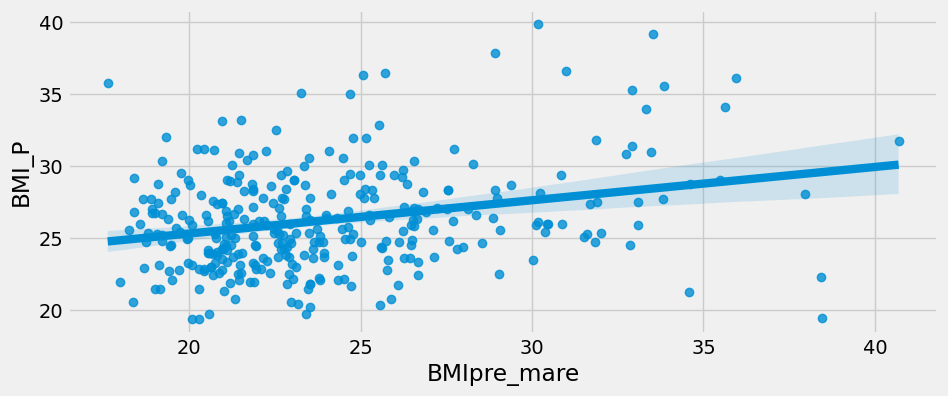

In [36]:
plt.style.use('fivethirtyeight')
plt.subplots(figsize=(10,4))
sns.regplot(x='BMIpre_mare',y='BMI_P',data=data)
plt.show()

Podem fer servir la regressió BMI_P ~ BMIpre_mare + BMI_2_EM + BMI_3_EM

In [37]:
var_missing=['BMI_P','BMIpre_mare','BMI_2_EM','BMI_3_EM']
subset = data_copy[var_missing]
dependent_variable = 'BMI_P'
i=0
for idx,row in subset.iterrows():
  if np.isnan(row[dependent_variable]):
    if non_missing := list(row[row.notna()].index.values):  # list de les variables NO MISSING de la row
      formula = f'{dependent_variable} ~ {"+".join(non_missing)}'
      predictors = row[non_missing].values
      non_missing.append(dependent_variable)
      df = subset[non_missing].dropna()  # Creem un subset del DF amb les rows que contenen tots els valors de la formula
      model = ols(formula=formula, data=df).fit()   
      prediccio = round(np.array(model.params)[0]+np.dot(np.array(model.params)[1:],predictors),2)
      data.loc[idx,dependent_variable] = prediccio
      i+=1
print(f"Total d'imputacions realitzades: {i}")

Total d'imputacions realitzades: 54


In [38]:
cols_missing=[]
mis=0
for col in data.columns:
  if len(data[col].isna().value_counts().index)==2:
    mis+=data[col].isna().value_counts()[1]
    print(f'Columna {col}: {data[col].isna().value_counts()[1]} NaN')
    cols_missing.append(col)

print()
print(f'Número de columnes amb NaN: {len(cols_missing)}')
print()
print(f'Total missing values: {mis}')

Columna tabac_preM: 36 NaN
Columna alcohol_preM: 36 NaN
Columna BWM: 65 NaN
Columna Parity_EM: 11 NaN
Columna AgeP: 37 NaN
Columna HeightP: 49 NaN
Columna BMI_P: 2 NaN
Columna SmokingP: 48 NaN
Columna AlcoholP: 46 NaN
Columna BWP: 86 NaN
Columna tabac_gestM: 29 NaN
Columna mesos alim_mat_nen: 118 NaN

Número de columnes amb NaN: 12

Total missing values: 563


Hem aconseguit imputar 54 valors missing, pels 2 que falten imputem la mitjana:

In [39]:
i=0
for idx,row in data.iterrows():  # iterem entre totes les rows del DF
  if np.isnan(row['BMI_P']):  # si la variable es missing
    data.loc[idx,'BMI_P']=round(subset['BMI_P'].mean(),2)  # imputem la mitjana de la variable, 2 decimals
    i+=1
print(f"Total d'imputacions realitzades: {i}")

Total d'imputacions realitzades: 2


Analitzem *HeightP*:

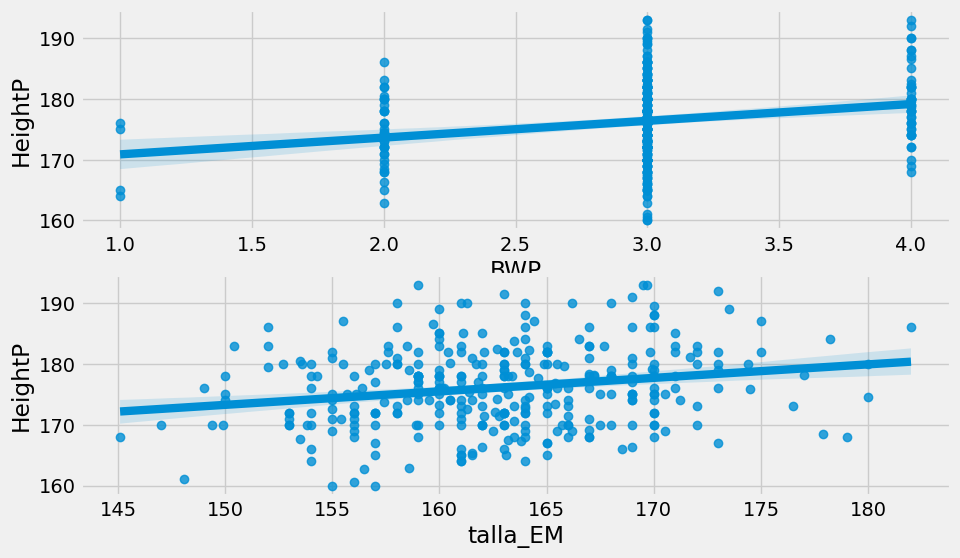

In [40]:
plt.style.use('fivethirtyeight')
fig, axes = plt.subplots(2, 1,figsize=(10,6))
sns.regplot(x='BWP',y='HeightP',data=data,ax=axes[0])
sns.regplot(x='talla_EM',y='HeightP',data=data,ax=axes[1])
plt.show()

Podem fer servir la regressió que ens donaria valors entre 172 i 178 o directament imputar la mitjana.

Fem servir la regressió HeightP ~ BWP + talla_EM

In [41]:
var_missing = ['HeightP','BWP','talla_EM']
subset = data_copy[var_missing]
dependent_variable = 'HeightP'
i=0
for idx,row in subset.iterrows():
  if np.isnan(row[dependent_variable]):
    non_missing=list(row[row.notna()].index.values)  # list de les variables NO MISSING de la row
    if 'talla_EM' in non_missing:  #si hi ha la variable talla_EM
      formula = f'{dependent_variable} ~ {"+".join(non_missing)}'
      predictors = row[non_missing].values
      non_missing.append(dependent_variable)
      df = subset[non_missing].dropna()
      model = ols(formula=formula, data=df).fit()
      prediccio = round(np.array(model.params)[0]+np.dot(np.array(model.params)[1:],predictors))
      data.loc[idx,dependent_variable] = prediccio
      i+=1
print(f"Total d'imputacions realitzades: {i}")

Total d'imputacions realitzades: 49


Hem imputat els 49 valors missing de la variable *HeightP*, mirem ara *AgeP*:

*AgeP* només té relació amb l'edat de la mare i *Parity_EM*

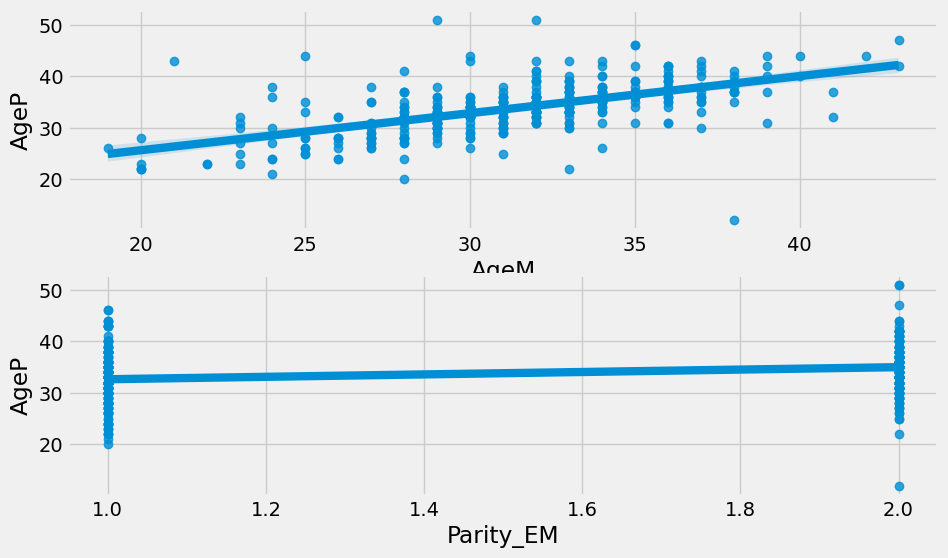

In [42]:
plt.style.use('fivethirtyeight')
fig, axes = plt.subplots(2, 1,figsize=(10,6))
sns.regplot(x='AgeM',y='AgeP',data=data,ax=axes[0])
sns.regplot(x='Parity_EM',y='AgeP',data=data,ax=axes[1])
plt.show()

Fem servir la regressió AgeP ~ AgeM + Parity_EM

In [43]:
var_missing = ['AgeP','AgeM','Parity_EM']
subset = data_copy[var_missing]
dependent_variable = 'AgeP'
i = 0
for idx,row in subset.iterrows():
  if np.isnan(row[dependent_variable]):
    non_missing = list(row[row.notna()].index.values)
    if 'AgeM' in non_missing:
      formula = f'{dependent_variable} ~ {"+".join(non_missing)}'
      predictors = row[non_missing].values
      non_missing.append(dependent_variable)
      df = subset[non_missing].dropna()
      model = ols(formula=formula, data=df).fit()
      prediccio = round(np.array(model.params)[0]+np.dot(np.array(model.params)[1:],predictors))
      data.loc[idx,dependent_variable] = prediccio
      i+=1
print(f"Total d'imputacions realitzades: {i}")

Total d'imputacions realitzades: 37


In [44]:
cols_missing=[]
mis=0
for col in data.columns:
  if len(data[col].isna().value_counts().index)==2:
    mis+=data[col].isna().value_counts()[1]
    print(f'Columna {col}: {data[col].isna().value_counts()[1]} NaN')
    cols_missing.append(col)

print()
print(f'Número de columnes amb NaN: {len(cols_missing)}')
print()
print(f'Total missing values: {mis}')

Columna tabac_preM: 36 NaN
Columna alcohol_preM: 36 NaN
Columna BWM: 65 NaN
Columna Parity_EM: 11 NaN
Columna SmokingP: 48 NaN
Columna AlcoholP: 46 NaN
Columna BWP: 86 NaN
Columna tabac_gestM: 29 NaN
Columna mesos alim_mat_nen: 118 NaN

Número de columnes amb NaN: 9

Total missing values: 475


Pel que fa a les variable *mesos alim_mat_nen* imputem la mitjana ja que no té relació amb cap altre variable i les prediccions serien poc fiables.

In [45]:
mean = data_copy['mesos alim_mat_nen'].mean()
i = 0
for idx, value in data_copy[['mesos alim_mat_nen']].itertuples():
    if np.isnan(value):
        data.loc[idx,'mesos alim_mat_nen'] = mean
        i += 1
print(f"Total d'imputacions realitzades: {i}")

Total d'imputacions realitzades: 118


In [46]:
cols_missing=[]
mis=0
for col in data.columns:
  if len(data[col].isna().value_counts().index)==2:
    mis+=data[col].isna().value_counts()[1]
    print(f'Columna {col}: {data[col].isna().value_counts()[1]} NaN')
    cols_missing.append(col)

print()
print(f'Número de columnes amb NaN: {len(cols_missing)}')
print()
print(f'Total missing values: {mis}')

Columna tabac_preM: 36 NaN
Columna alcohol_preM: 36 NaN
Columna BWM: 65 NaN
Columna Parity_EM: 11 NaN
Columna SmokingP: 48 NaN
Columna AlcoholP: 46 NaN
Columna BWP: 86 NaN
Columna tabac_gestM: 29 NaN

Número de columnes amb NaN: 8

Total missing values: 357


# Missing values categòrics

Analitzant la matriu de correlació podem veure que:
- tabac_preM te correlació amb tabac_gestM i SmokingP. Podem imputar el valor de tabac_gestM si no es missing, o bé SmokingP.
- tabac_gestM té correlació amb tabac_preM i SmokingP.
- alcohol_preM, te correlació amb alcoholP.
- parity_EM està correlacionat amb AgeP i AgeM. Ho analitzem més avall.
- SmokingP està correlacionat amb tabac_gestM i tabac_preM.
- AlcoholP està correlacionat amb alcohol_preM.
- BWM i BWP?

**tabac_preM**:

Imputem el valor de tabac_gestM i si és missing, el de tabac_preM.

In [54]:
np.isnan(data.tabac_preM).value_counts()

False    350
True      36
Name: tabac_preM, dtype: int64

In [62]:
n=0
for i in range(instances):
  if np.isnan(data_copy.loc[i, 'tabac_preM']):
    if ~np.isnan(data_copy.loc[i, 'tabac_gestM']):  # si tabac_gestM NO ÉS MISSING
      data.loc[i, 'tabac_preM'] = data_copy.loc[i, 'tabac_gestM']
      n+=1
    elif ~np.isnan(data_copy.loc[i, 'SmokingP']):  # si SmokingP NO ÉS MISSING
      data.loc[i, 'tabac_preM'] = data_copy.loc[i, 'SmokingP']
      n+=1
      
print(f"Total d'imputacions realitzades: {n}")
np.isnan(data.tabac_preM).value_counts()

Total d'imputacions realitzades: 8


False    358
True      28
Name: tabac_preM, dtype: int64

**tabac_gestM**:

Imputem el valor de tabac_preM i si és missing, el de SmokingP.

In [59]:
np.isnan(data.tabac_gestM).value_counts()

False    357
True      29
Name: tabac_gestM, dtype: int64

In [61]:
n=0
for i in range(instances):
  if np.isnan(data_copy.loc[i, 'tabac_gestM']):
    if ~np.isnan(data_copy.loc[i, 'tabac_preM']):
      data.loc[i, 'tabac_gestM'] = data_copy.loc[i, 'tabac_preM']
      n+=1
    elif ~np.isnan(data_copy.loc[i, 'SmokingP']):
      data.loc[i, 'tabac_gestM'] = data_copy.loc[i, 'SmokingP']
      n+=1

print(f"Total d'imputacions realitzades: {n}")
print(np.isnan(data.tabac_gestM).value_counts())

Total d'imputacions realitzades: 1
False    358
True      28
Name: tabac_gestM, dtype: int64


**alcohol_preM**:

Imputem el valor de alcohol_P

In [54]:
np.isnan(data.alcohol_preM).value_counts()

False    350
True      36
Name: alcohol_preM, dtype: int64

In [63]:
n=0
for i in range(instances):
  if np.isnan(data_copy.loc[i, 'alcohol_preM']):
    if ~np.isnan(data_copy.loc[i, 'AlcoholP']):
      data.loc[i, 'alcohol_preM'] = data_copy.loc[i, 'AlcoholP']
      n+=1

print(f"Total d'imputacions realitzades: {n}")
print(np.isnan(data.alcohol_preM).value_counts())

Total d'imputacions realitzades: 5
False    355
True      31
Name: alcohol_preM, dtype: int64


Analitzem **Parity_EM**:

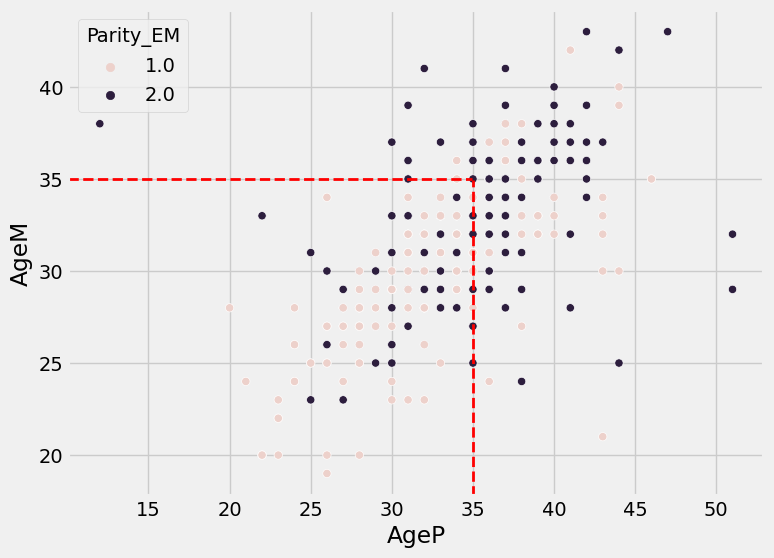

In [79]:
plt.style.use('fivethirtyeight')
plt.subplots(figsize=(8,6))
sns.scatterplot(data=data, x='AgeP', y='AgeM', hue='Parity_EM')
# plt.axhline(y=18, color='black', linewidth=0.5)  # Adding x-axis at y=0
# plt.axvline(x=20, color='black', linewidth=0.5)  # Adding y-axis at x=0
plt.axvline(x=35, color='red', linewidth=2, linestyle='--', ymin=0, ymax=0.65)
plt.axhline(y=35, color='red', linewidth=2, linestyle='--', xmin=0, xmax=0.58)
plt.show()

Podem veure com si l'edad del pare i de la mare es inferior a 35, hi ha molta més probabilitat que sigui el primer fill. Mentre que si es superior, hi ha més probabilitat que sigui el segon. Imputem els missing values segons aquest criteri:

In [70]:
np.isnan(data.Parity_EM).value_counts()#imputem els 11 valors missing

False    375
True      11
Name: Parity_EM, dtype: int64

In [68]:
for i in range(instances):
  if np.isnan(data_copy.loc[i, 'Parity_EM']):
    if (data_copy.loc[i, 'AgeP']<35)&(data_copy.loc[i, 'AgeM']<35):
      data.loc[i, 'Parity_EM'] = 1
    else:
      data.loc[i, 'Parity_EM'] = 2

print(np.isnan(data.Parity_EM).value_counts())

False    386
Name: Parity_EM, dtype: int64


**SmokingP**

Imputem el valor de tabac_gestM i si és missing, el de tabac_preM

In [80]:
np.isnan(data.SmokingP).value_counts()

False    338
True      48
Name: SmokingP, dtype: int64

In [81]:
n=0
for i in range(instances):
  if np.isnan(data_copy.loc[i, 'SmokingP']):
    if ~np.isnan(data_copy.loc[i, 'tabac_gestM']):
      data.loc[i, 'SmokingP'] = data_copy.loc[i, 'tabac_gestM']
      n+=1
    elif ~np.isnan(data.loc[i, 'tabac_preM']):
      data.loc[i, 'SmokingP'] = data_copy.loc[i, 'tabac_preM']
      n+=1

print(f"Total d'imputacions realitzades: {n}")
print(np.isnan(data.SmokingP).value_counts())

Total d'imputacions realitzades: 20
False    358
True      28
Name: SmokingP, dtype: int64


**AlcoholP**

Imputem el valor de alcohol_preM

In [82]:
np.isnan(data.AlcoholP).value_counts()

False    340
True      46
Name: AlcoholP, dtype: int64

In [83]:
n=0
for i in range(instances):
  if np.isnan(data_copy.loc[i, 'AlcoholP']):
    if ~np.isnan(data_copy.loc[i, 'alcohol_preM']):
      data.loc[i, 'AlcoholP'] = data_copy.loc[i, 'alcohol_preM']
      n+=1

print(f"Total d'imputacions realitzades: {n}")
print(np.isnan(data.AlcoholP).value_counts())

Total d'imputacions realitzades: 15
False    355
True      31
Name: AlcoholP, dtype: int64


Calculem quants missing values queden al dataset:

In [84]:
cols_missing=[]
mis=0
for col in data.columns:
  if len(data[col].isna().value_counts().index)==2:
    mis+=data[col].isna().value_counts()[1]
    print(f'Columna {col}: {data[col].isna().value_counts()[1]} NaN')
    cols_missing.append(col)

print()
print(f'Número de columnes amb NaN: {len(cols_missing)}')
print()
print(f'Total missing values: {mis}')

Columna tabac_preM: 28 NaN
Columna alcohol_preM: 31 NaN
Columna BWM: 65 NaN
Columna SmokingP: 28 NaN
Columna AlcoholP: 31 NaN
Columna BWP: 86 NaN
Columna tabac_gestM: 28 NaN

Número de columnes amb NaN: 7

Total missing values: 297


Amb el procés d'imputació hem passat de 1304 missing values a només 297. Per aquests valors que queden imputem la **moda**.

In [85]:
var_missing=['tabac_preM', 'alcohol_preM', 'BWM', 'SmokingP', 'AlcoholP', 'BWP', 'tabac_gestM']
i=0
for var in var_missing:
  for idx, row in data[var_missing].iterrows():  # iterem entre totes les rows del DF
    if np.isnan(row[var]):  # si la variable es missing
      data.loc[idx, var] = round(data_copy[var].mode()[0])  # imputem la moda de la variable
      i+=1

print(f"Total d'imputacions realitzades: {i}")

Total d'imputacions realitzades: 297


In [86]:
cols_missing=[]
mis=0
for col in data.columns:
  if len(data[col].isna().value_counts().index)==2:
    mis+=data[col].isna().value_counts()[1]
    print(f'Columna {col}: {data[col].isna().value_counts()[1]} NaN')
    cols_missing.append(col)

print()
print(f'Número de columnes amb NaN: {len(cols_missing)}')
print()
print(f'Total missing values: {mis}')


Número de columnes amb NaN: 0

Total missing values: 0


In [88]:
data['BMIpre_mare']=round(data['BMIpre_mare'],2)
data['BMI_P']=round(data['BMI_P'],2)
data['BMI_2_EM']=round(data['BMI_2_EM'],2)
data['BMI_3_EM']=round(data['BMI_3_EM'],2)

In [71]:
#data.to_csv('output.csv', index=False)

# Estudi cutoffs discretització

In [89]:
target='OBE1TY_5Y_grup'

In [91]:
float_features = ['AgeM','talla_EM','BMIpre_mare','AgeP','HeightP','BMI_P','BMI_2_EM','tas_2_EM',
                  'tad_2_EM','BMI_3_EM','tas_3_EM','tad_3_EM','EG','weight_B','Height_B','pes placenta',
                  'mesos alim_mat_nen','Pes 2m_nen','Alçada 2m_nen','Pes 4m_nen','Alçada 4m_nen','pes 6m_nen',
                  'alçada 6m_nen','pes 12m_nen','alçada 12m_nen']

print(len(float_features))

25


C:\Users\David\AppData\Local\Temp\ipykernel_14488\1681641378.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,5,i+1)


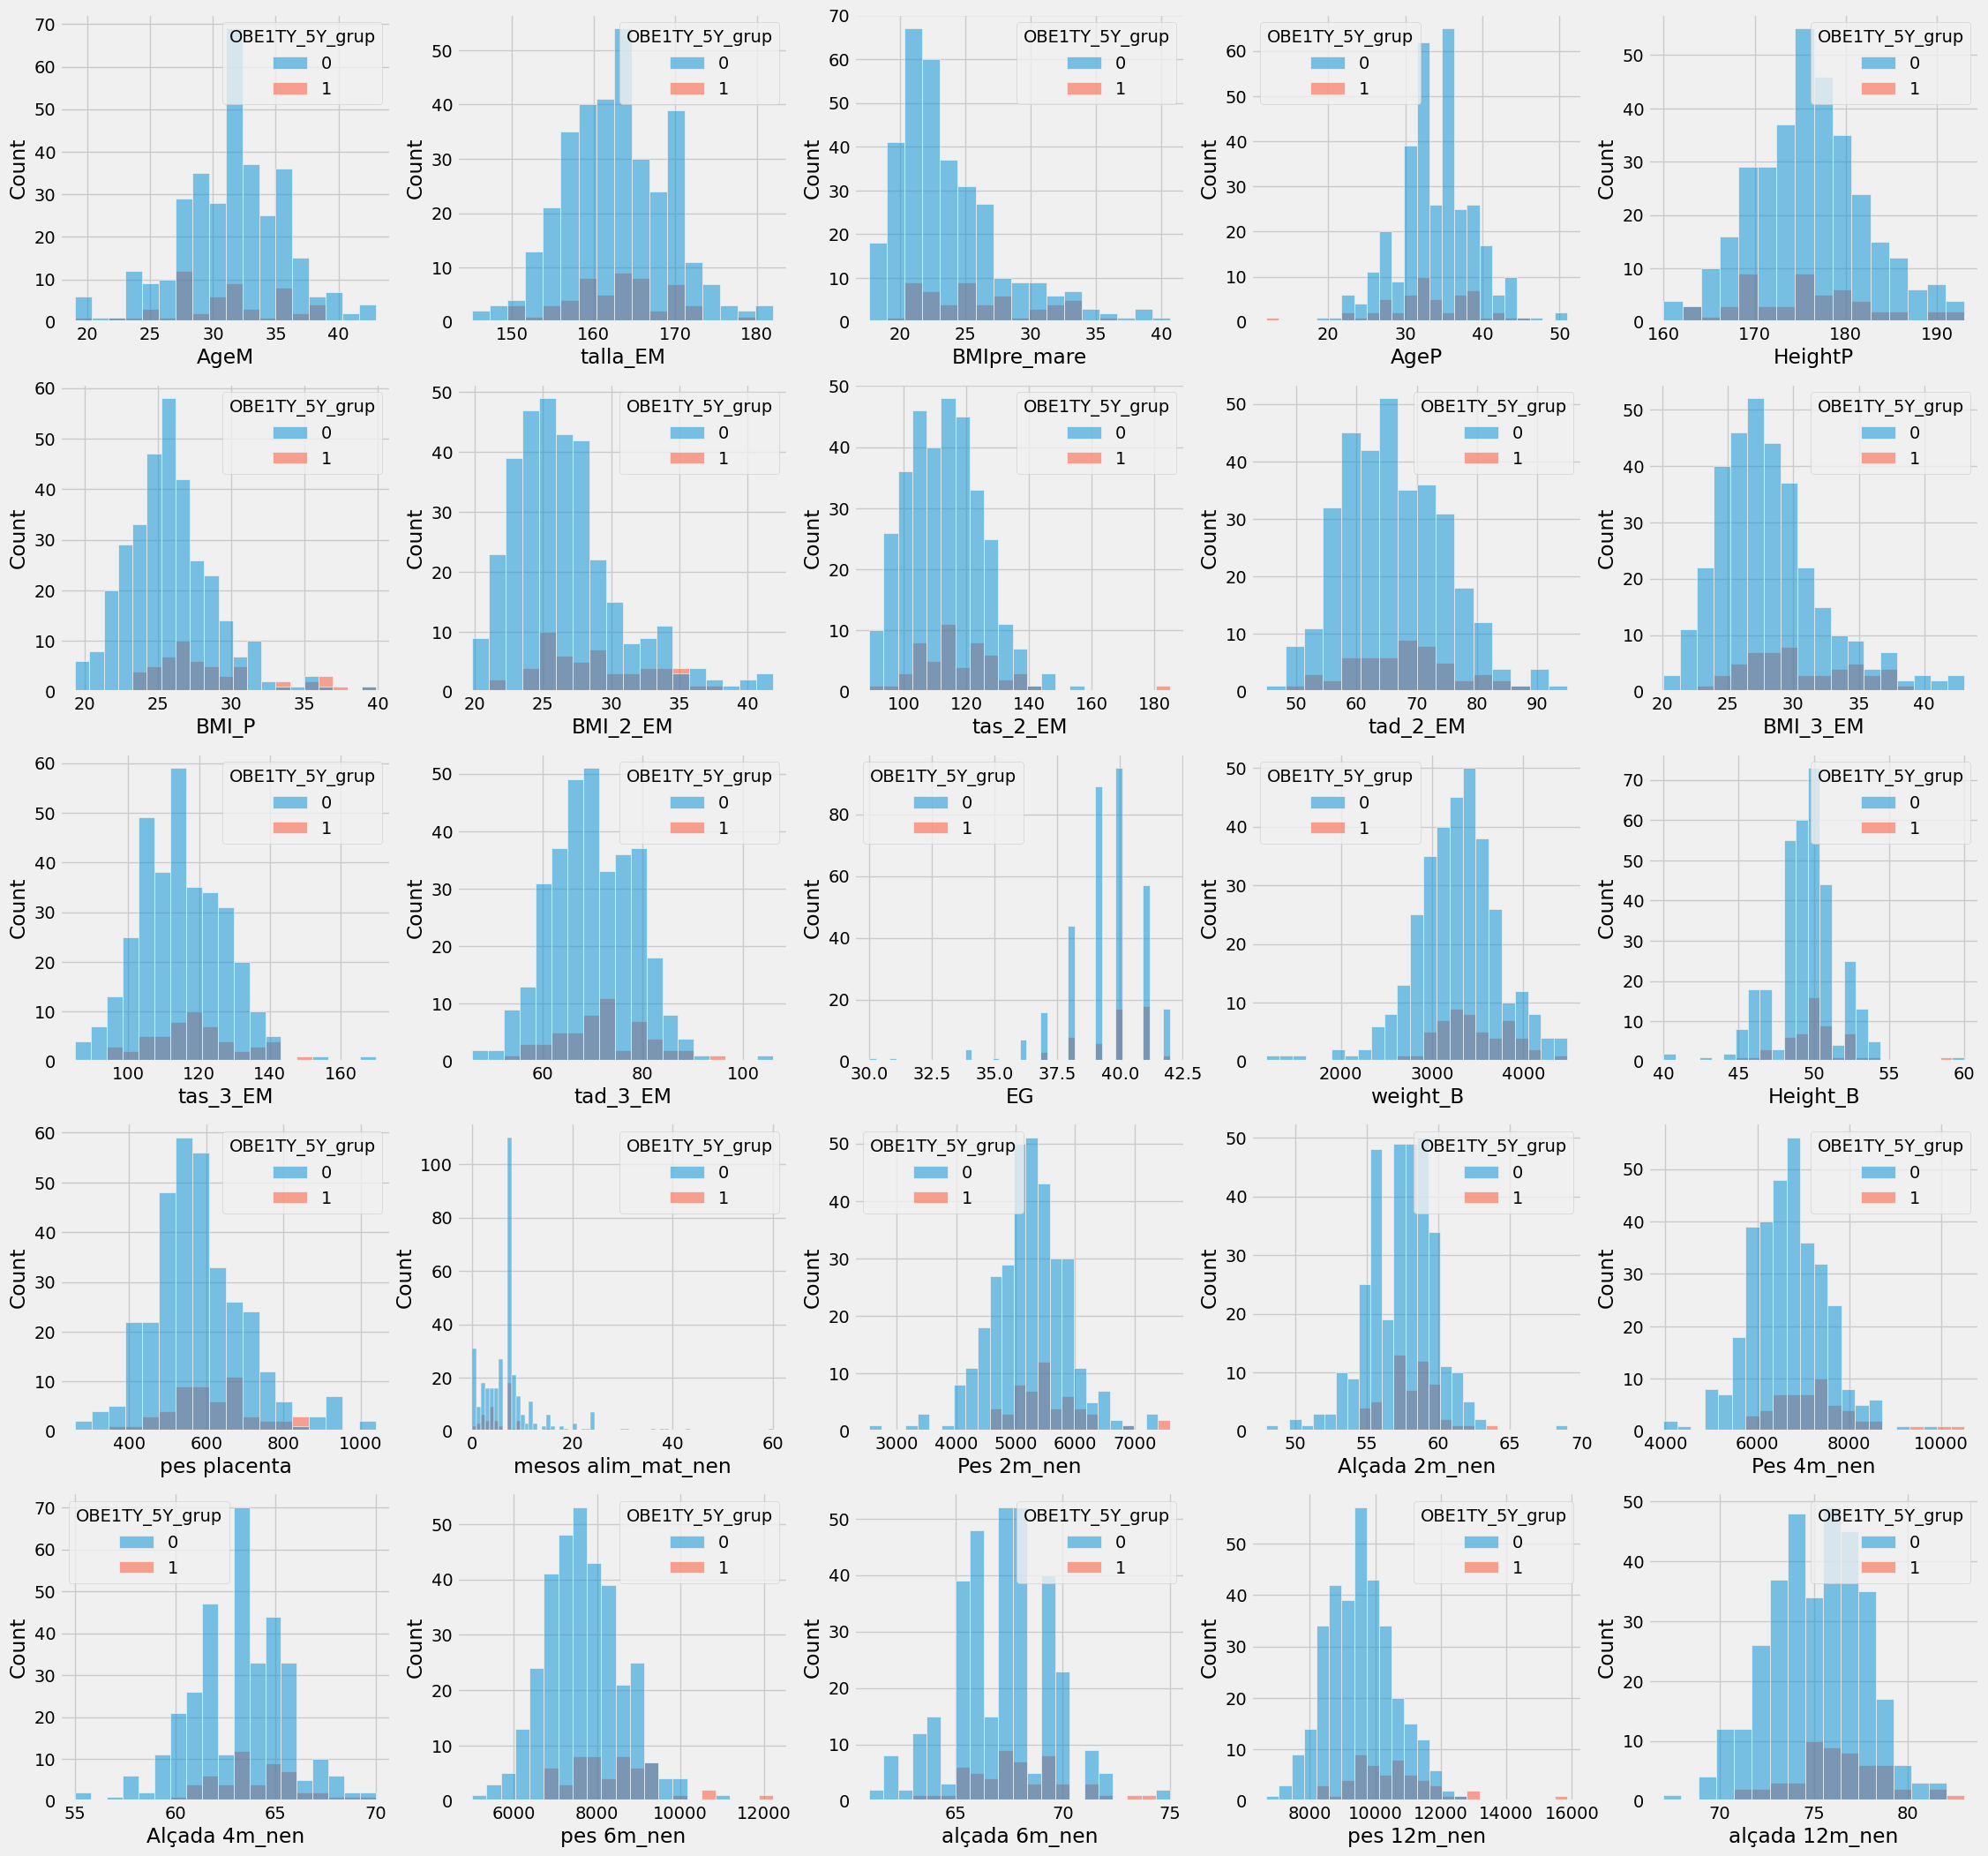

In [92]:
plt.style.use('fivethirtyeight')
plt.subplots(figsize=(25,25))
for i, column in enumerate(float_features):
    plt.subplot(5,5,i+1)
    sns.histplot(data=data, x=column, hue=target)
    #plt.title(column)
plt.show()

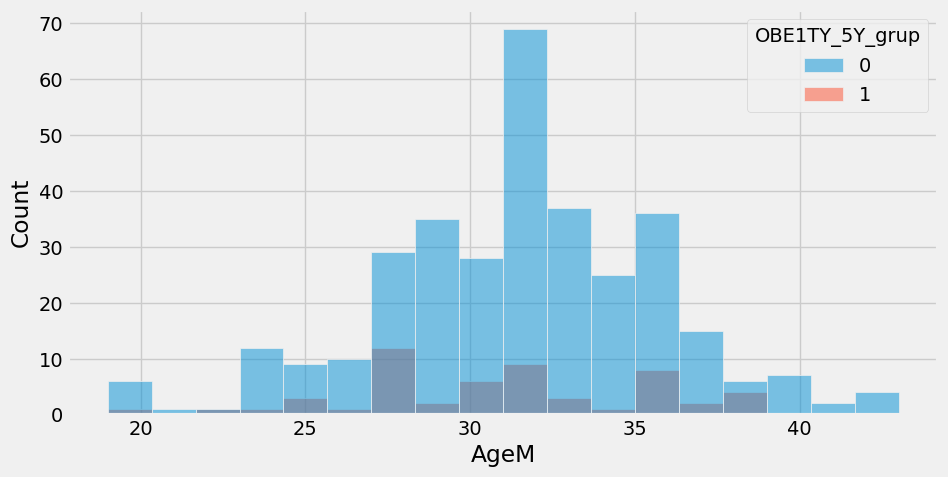

In [95]:
plt.style.use('fivethirtyeight')
plt.subplots(figsize=(10,5))
sns.histplot(data=data, x='AgeM', hue=target)
plt.show()

Proposo 4 bins:

*   AgeM <= 25
*   25< AgeM <=30
*   30< AgeM <=35
*   35< AgeM

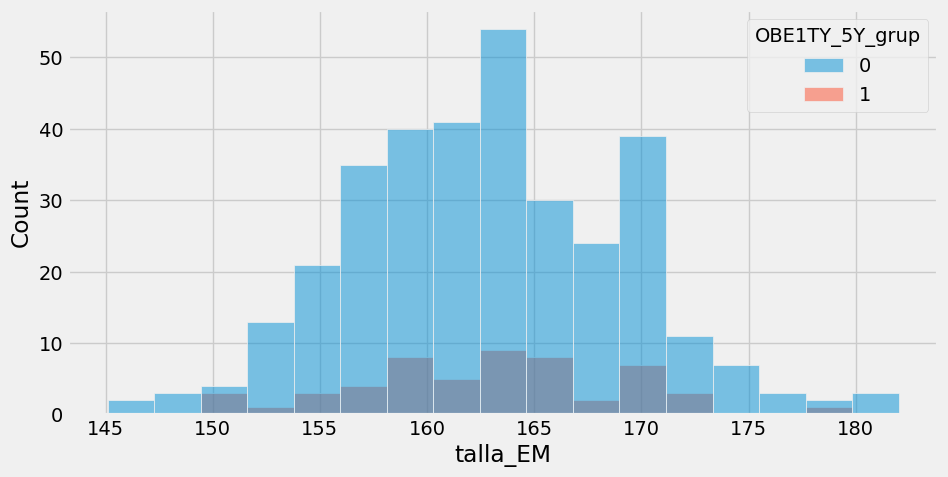

In [96]:
plt.subplots(figsize=(10,5))
sns.histplot(data=data, x='talla_EM', hue=target)
plt.show()

In [80]:
print(data['talla_EM'].quantile(0.25))
print(data['talla_EM'].quantile(0.5))
print(data['talla_EM'].quantile(0.75))

159.0
163.0
167.0


Proposo 4 bins:

*   talla_EM <= 159
*   159< talla_EM <=163
*   163< talla_EM <=167
*   167< talla_EM

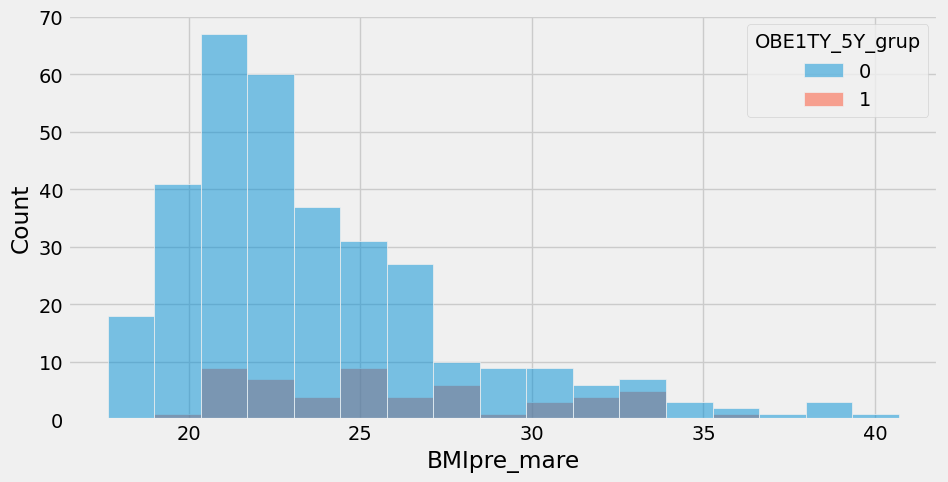

In [97]:
plt.subplots(figsize=(10,5))
sns.histplot(data=data, x='BMIpre_mare', hue=target)
plt.show()

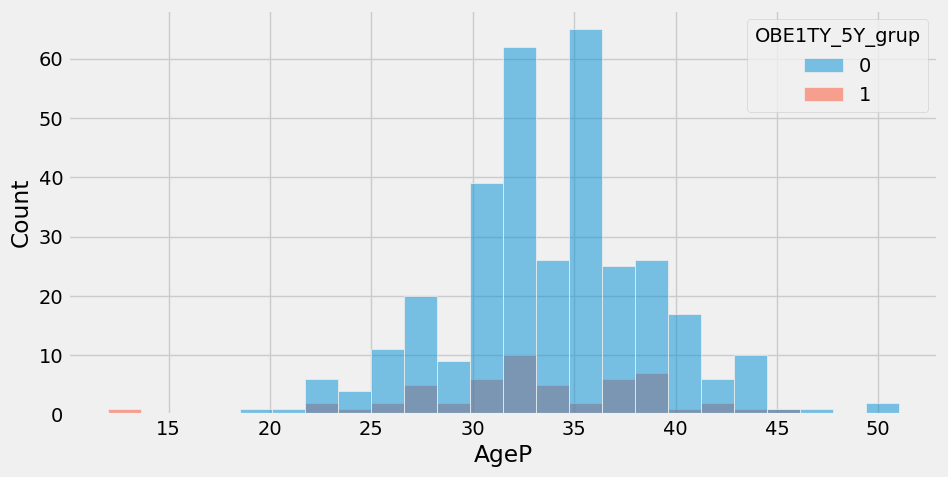

In [98]:
plt.subplots(figsize=(10,5))
sns.histplot(data=data, x='AgeP', hue=target)
plt.show()

In [83]:
print(data['AgeP'].quantile(0.25))
print(data['AgeP'].quantile(0.5))
print(data['AgeP'].quantile(0.75))

31.0
34.0
37.0


Proposo 4 bins:

*   AgeP <= 30
*   30< AgeP <=35
*   35< AgeP <=40
*   40< AgeP

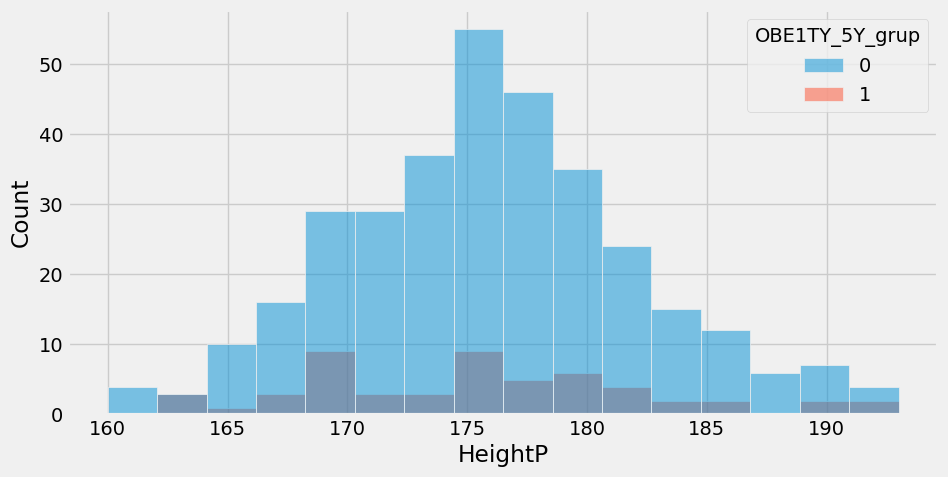

In [99]:
plt.subplots(figsize=(10,5))
sns.histplot(data=data, x='HeightP', hue=target)
plt.show()

In [85]:
print(data['HeightP'].quantile(0.25))
print(data['HeightP'].quantile(0.5))
print(data['HeightP'].quantile(0.75))

172.0
176.0
180.0


Proposo 4 bins:

*   HeightP <= 170
*   170< HeightP <=175
*   175< HeightP <=180
*   180< HeightP

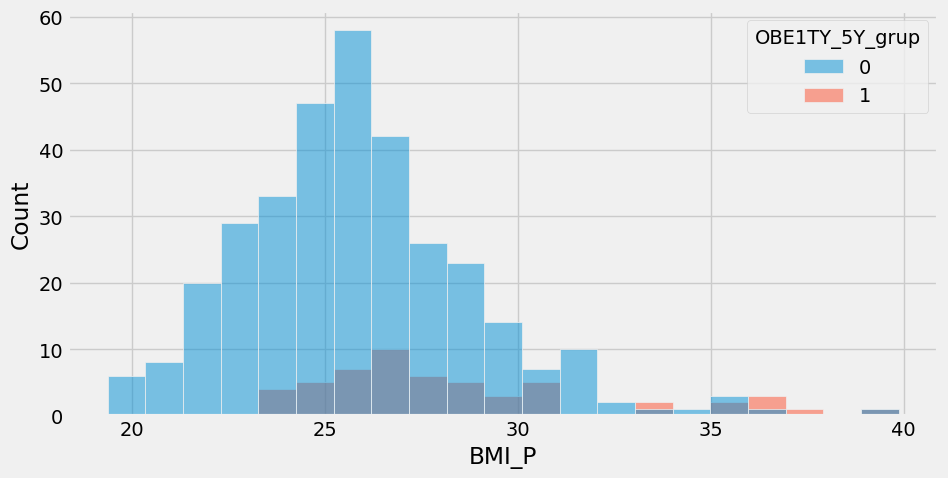

In [100]:
plt.subplots(figsize=(10,5))
sns.histplot(data=data, x='BMI_P', hue=target)
plt.show()

4 bins:

*   Normal weight: 18.5 <= BMI < 25
*   Overweight: 25 <= BMI < 30
*   Obese class I: 30 <= BMI < 35
*   Obese class II: BMI >= 35

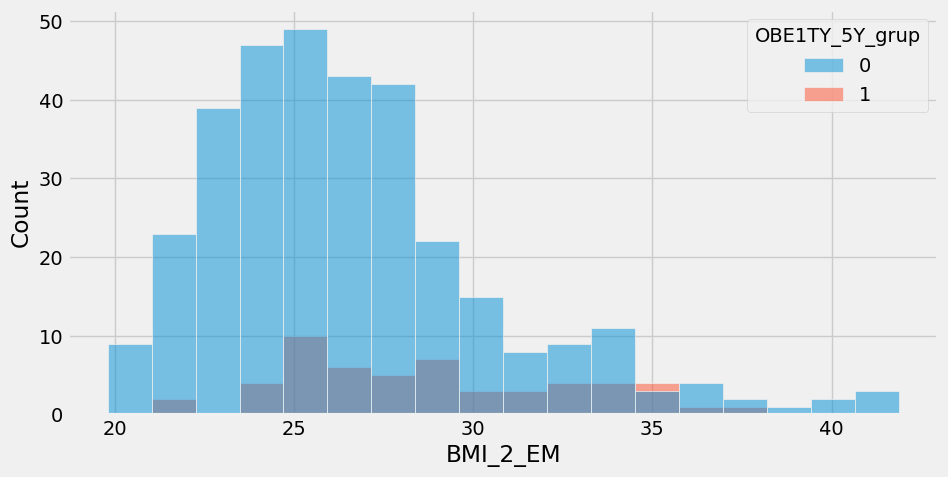

In [101]:
plt.subplots(figsize=(10,5))
sns.histplot(data=data, x='BMI_2_EM', hue=target)
plt.show()

In [88]:
print('min:',data['BMI_2_EM'].min())
print('max:',data['BMI_2_EM'].max())
print(data['BMI_2_EM'].quantile(0.25))
print(data['BMI_2_EM'].quantile(0.5))
print(data['BMI_2_EM'].quantile(0.75))

min: 19.81
max: 41.87
24.012500000000003
26.15
28.6875


Proposo 4 bins:

*   BMI_2_EM <= 24
*   24 < BMI_2_EM <= 26
*   26 < BMI_2_EM <= 28.5
*   28.5 < BMI_2_EM

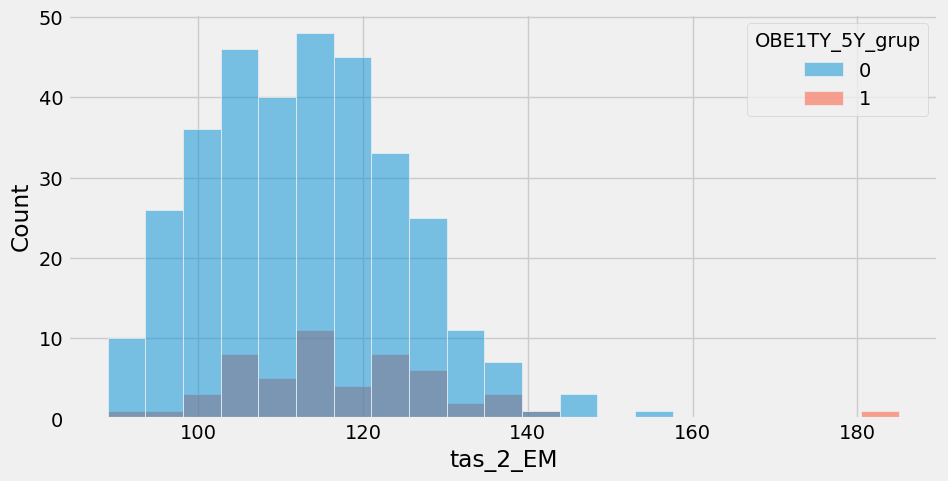

In [102]:
plt.subplots(figsize=(10,5))
sns.histplot(data=data, x='tas_2_EM', hue=target)
plt.show()

In [90]:
print('min:',data['tas_2_EM'].min())
print('max:',data['tas_2_EM'].max())
print(data['tas_2_EM'].quantile(0.25))
print(data['tas_2_EM'].quantile(0.5))
print(data['tas_2_EM'].quantile(0.75))

min: 89.0
max: 185.0
104.0
113.0
121.0


Proposo 4 bins:

*   tas_2_EM <= 104
*   104 < tas_2_EM <= 113
*   113 < tas_2_EM <= 121
*   121 < tas_2_EM

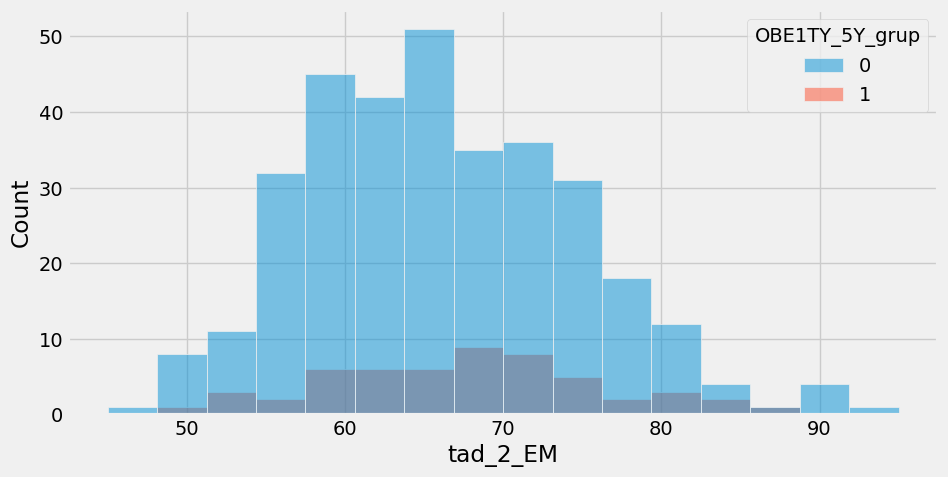

In [103]:
plt.subplots(figsize=(10,5))
sns.histplot(data=data, x='tad_2_EM', hue=target)
plt.show()

In [92]:
print('min:',data['tad_2_EM'].min())
print('max:',data['tad_2_EM'].max())
print(data['tad_2_EM'].quantile(0.25))
print(data['tad_2_EM'].quantile(0.5))
print(data['tad_2_EM'].quantile(0.75))

min: 45.0
max: 95.0
60.0
65.0
72.0


Proposo 4 bins:

*   tad_2_EM <= 60
*   60 < tad_2_EM <= 65
*   65 < tad_2_EM <= 72
*   72 < tad_2_EM

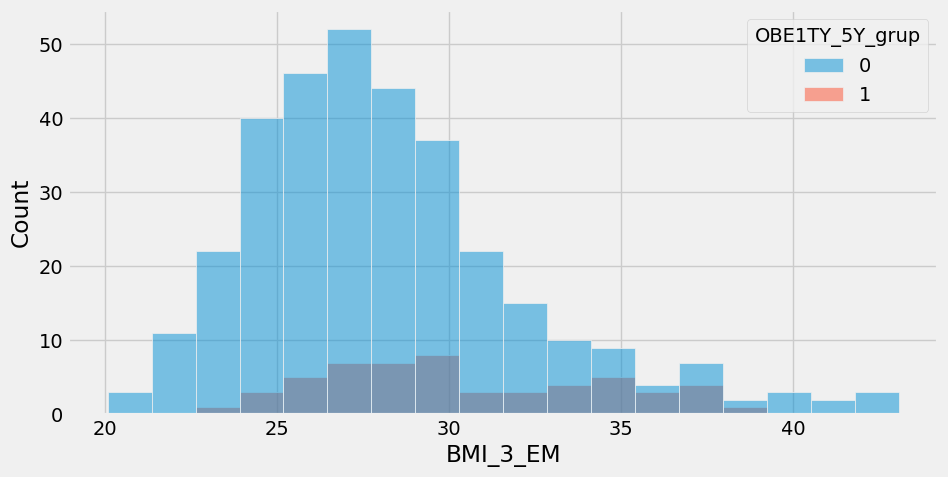

In [104]:
plt.subplots(figsize=(10,5))
sns.histplot(data=data, x='BMI_3_EM', hue=target)
plt.show()

In [94]:
print('min:',data['BMI_3_EM'].min())
print('max:',data['BMI_3_EM'].max())
print(data['BMI_3_EM'].quantile(0.25))
print(data['BMI_3_EM'].quantile(0.5))
print(data['BMI_3_EM'].quantile(0.75))

min: 20.08
max: 43.06
25.6425
27.785
30.4725


Proposo 4 bins:

*   BMI_3_EM <= 25.5
*   25.5 < BMI_3_EM <= 28
*   28 < BMI_3_EM <= 30.5
*   30.5 < BMI_3_EM

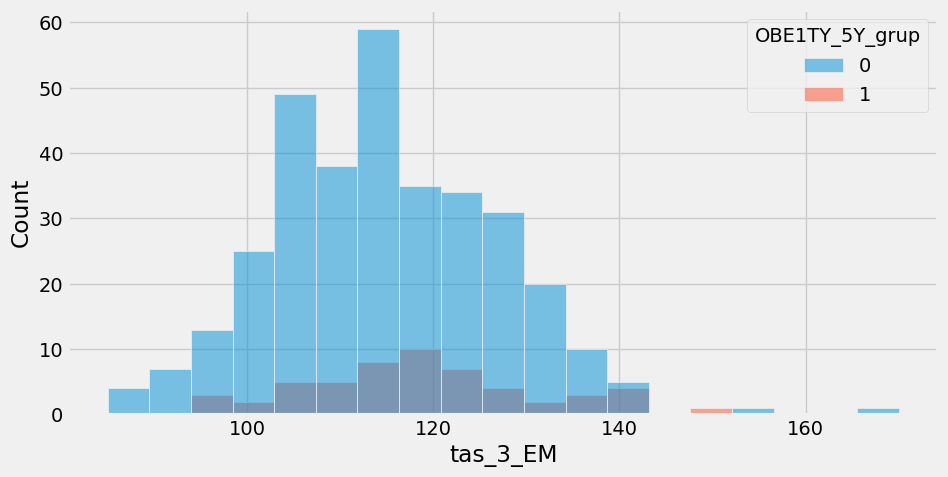

In [105]:
plt.subplots(figsize=(10,5))
sns.histplot(data=data, x='tas_3_EM', hue=target)
plt.show()

In [96]:
print('min:',data['tas_3_EM'].min())
print('max:',data['tas_3_EM'].max())
print(data['tas_3_EM'].quantile(0.25))
print(data['tas_3_EM'].quantile(0.5))
print(data['tas_3_EM'].quantile(0.75))

min: 85.0
max: 170.0
106.25
114.0
123.0


Proposo 4 bins:

*   tas_3_EM <= 106
*   106 < tas_3_EM <= 114
*   114 < tas_3_EM <= 123
*   123 < tas_3_EM

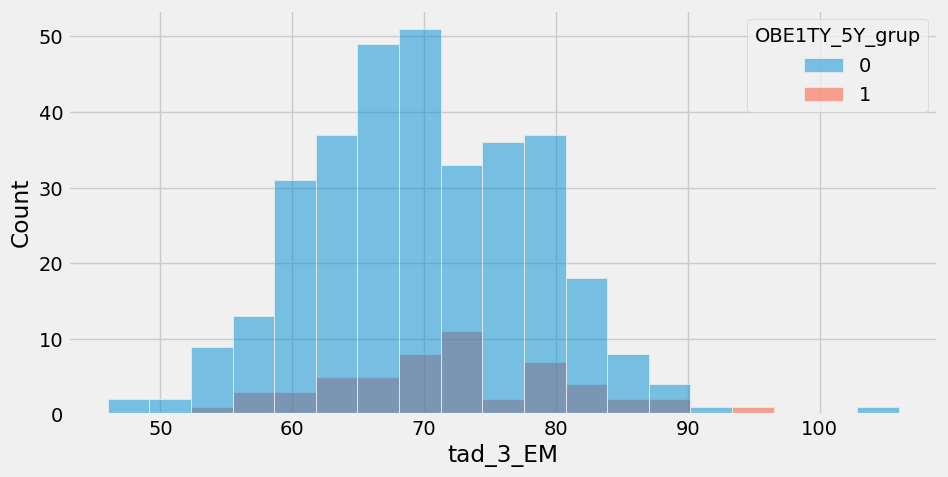

In [106]:
plt.subplots(figsize=(10,5))
sns.histplot(data=data, x='tad_3_EM', hue=target)
plt.show()

In [98]:
print('min:',data['tad_3_EM'].min())
print('max:',data['tad_3_EM'].max())
print(data['tad_3_EM'].quantile(0.25))
print(data['tad_3_EM'].quantile(0.5))
print(data['tad_3_EM'].quantile(0.75))

min: 46.0
max: 106.0
64.0
70.0
76.0


Proposo 4 bins:

*   tad_3_EM <= 64
*   64 < tad_3_EM <= 70
*   70 < tad_3_EM <= 76
*   76 < tad_3_EM

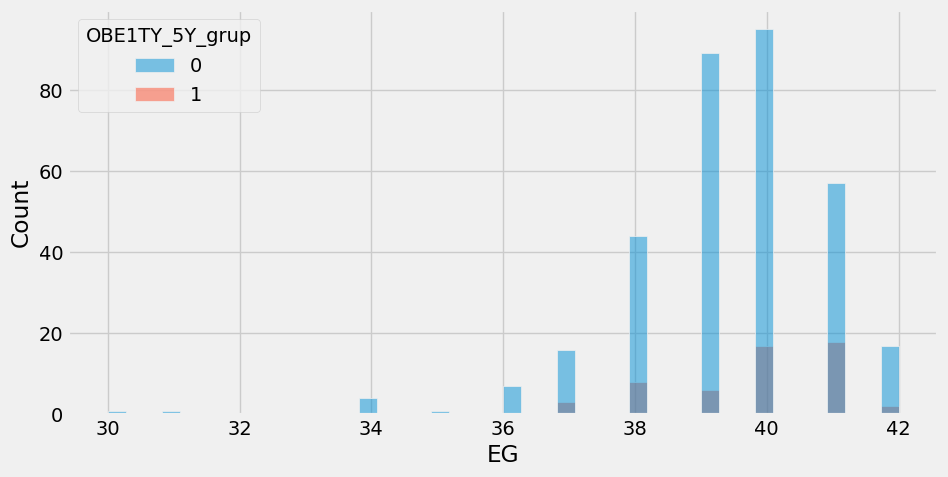

In [107]:
plt.subplots(figsize=(10,5))
sns.histplot(data=data, x='EG', hue=target)
plt.show()

In [100]:
print(data['EG'].quantile(0.25))
print(data['EG'].quantile(0.5))
print(data['EG'].quantile(0.75))

39.0
40.0
40.0


Proposo 4 bins:

*   EG <= 36
*   36< EG <=39
*   39< EG <=40
*   40< EG

En la meva opinió aquesta variable no és important i s'hauria d'excloure.

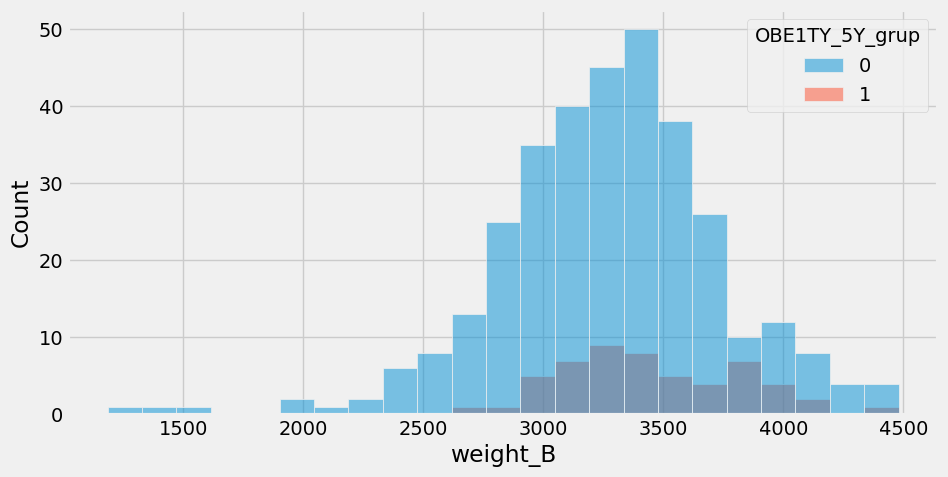

In [108]:
plt.subplots(figsize=(10,5))
sns.histplot(data=data, x='weight_B', hue=target)
plt.show()

Proposo 4 bins:

*   weight_B <= 3000
*   3000< weight_B <=3500
*   3500< weight_B <=4000
*   4000< weight_B

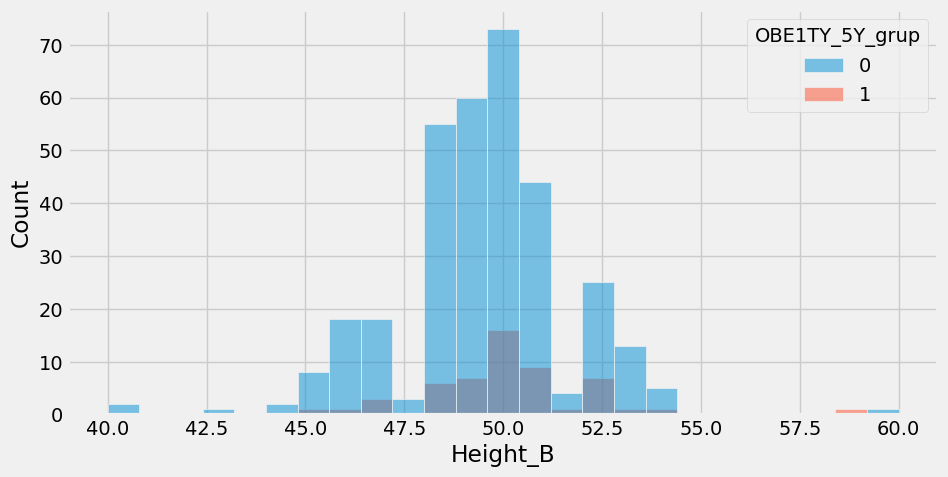

In [109]:
plt.subplots(figsize=(10,5))
sns.histplot(data=data, x='Height_B', hue=target)
plt.show()

In [103]:
print(data['Height_B'].quantile(0.25))
print(data['Height_B'].quantile(0.5))
print(data['Height_B'].quantile(0.75))

48.0
50.0
51.0


Proposo 4 bins:

*   Height_B < 48
*   48<= Height_B < 50
*   50<= Height_B < 51
*   51<= Height_B

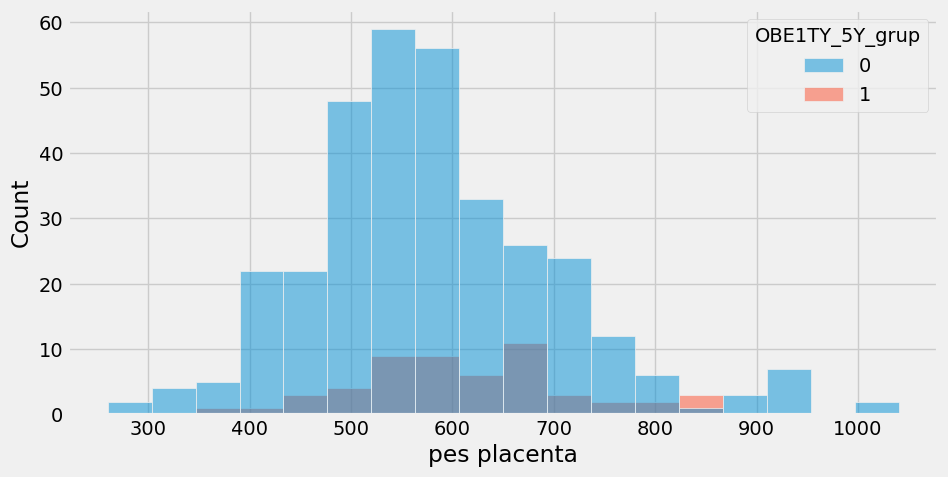

In [110]:
plt.subplots(figsize=(10,5))
sns.histplot(data=data, x='pes placenta', hue=target)
plt.show()

In [105]:
print(data['pes placenta'].quantile(0.25))
print(data['pes placenta'].quantile(0.5))
print(data['pes placenta'].quantile(0.75))

500.0
579.5
660.0


Proposo 4 bins:

*   pes placenta < 500
*   500<= pes placenta < 580
*   580<= pes placenta < 660
*   660<= pes placenta

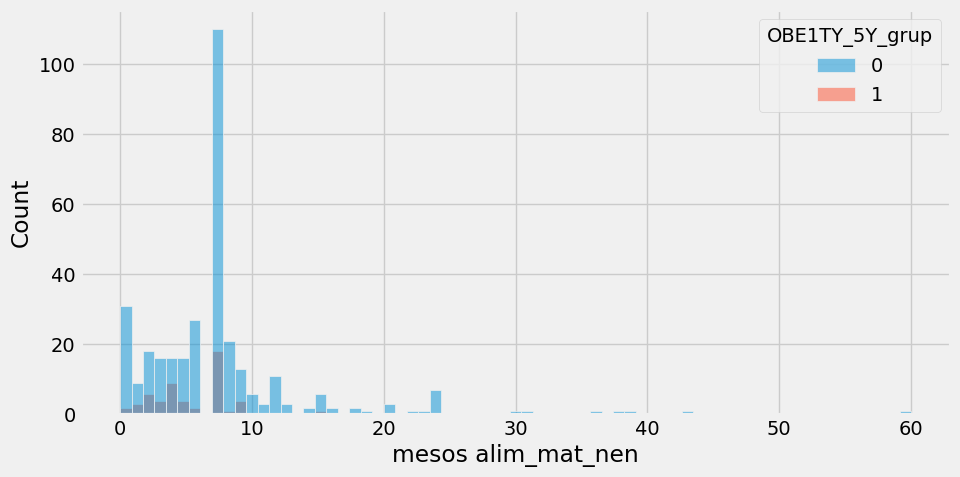

In [111]:
plt.subplots(figsize=(10,5))
sns.histplot(data=data, x='mesos alim_mat_nen', hue=target)
plt.show()

In [107]:
print(data['mesos alim_mat_nen'].quantile(0.25))
print(data['mesos alim_mat_nen'].quantile(0.5))
print(data['mesos alim_mat_nen'].quantile(0.75))

4.0
7.0
7.0


Proposo 4 bins:

*   mesos alim_mat_nen < 4
*   4<= mesos alim_mat_nen < 7
*   mesos alim_mat_nen = 7
*   7< mesos alim_mat_nen

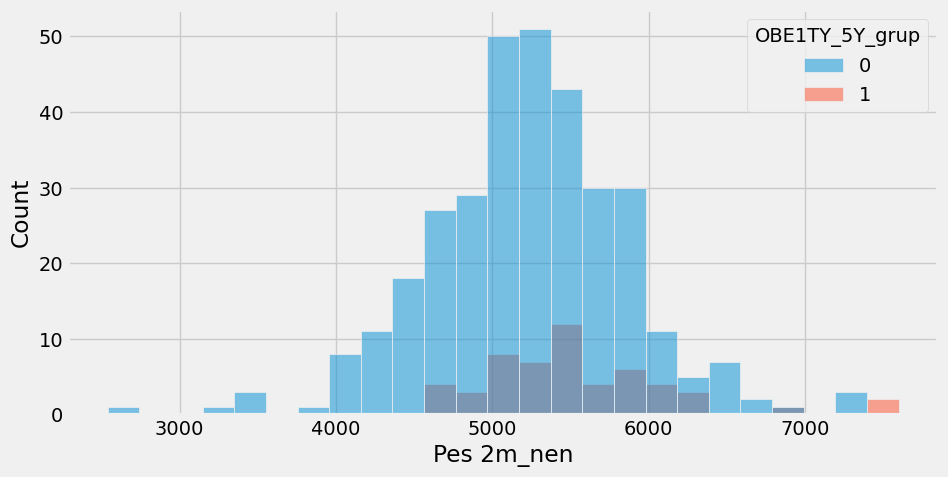

In [112]:
plt.subplots(figsize=(10,5))
sns.histplot(data=data, x='Pes 2m_nen', hue=target)
plt.show()

In [109]:
print(data['Pes 2m_nen'].quantile(0.25))
print(data['Pes 2m_nen'].quantile(0.5))
print(data['Pes 2m_nen'].quantile(0.75))

4892.5
5284.5
5642.5


Proposo 4 bins:

*   Pes 2m_nen < 4900
*   4900<= Pes 2m_nen < 5300
*   5300<= Pes 2m_nen < 5650
*   5650<= Pes 2m_nen

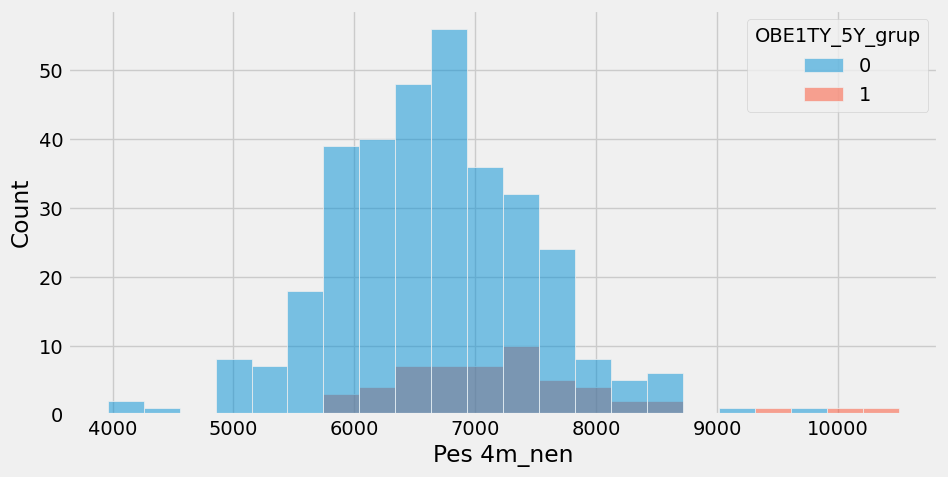

In [113]:
plt.subplots(figsize=(10,5))
sns.histplot(data=data, x='Pes 4m_nen', hue=target)
plt.show()

In [111]:
print(data['Pes 4m_nen'].quantile(0.25))
print(data['Pes 4m_nen'].quantile(0.5))
print(data['Pes 4m_nen'].quantile(0.75))

6162.5
6730.0
7267.5


Proposo 4 bins:

*   Pes 4m_nen < 6200
*   6200<= Pes 4m_nen < 6750
*   6750<= Pes 4m_nen < 7300
*   7300<= Pes 4m_nen

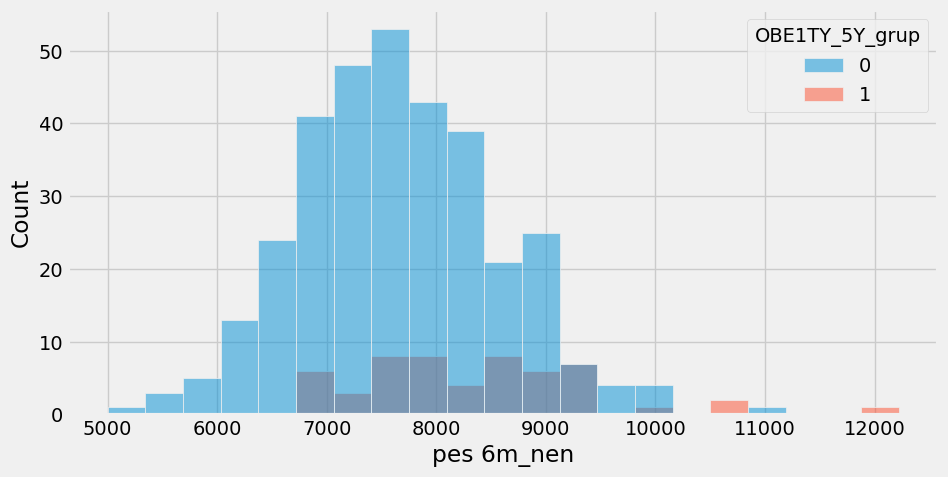

In [114]:
plt.subplots(figsize=(10,5))
sns.histplot(data=data, x='pes 6m_nen', hue=target)
plt.show()

In [113]:
print(data['pes 6m_nen'].quantile(0.25))
print(data['pes 6m_nen'].quantile(0.5))
print(data['pes 6m_nen'].quantile(0.75))

7082.5
7685.0
8345.0


Proposo 4 bins:

*   pes 6m_nen < 7100
*   7100<= pes 6m_nen < 7700
*   7700<= pes 6m_nen < 8350
*   8350<= pes 6m_nen

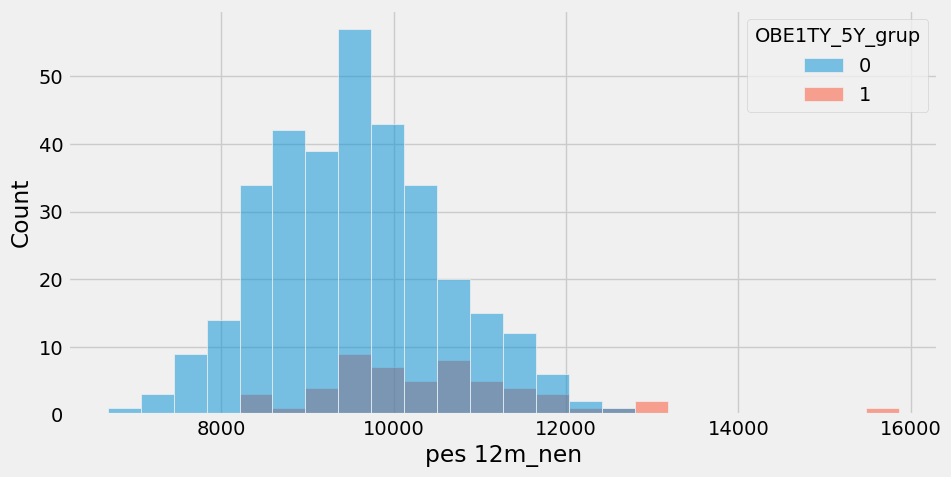

In [115]:
plt.subplots(figsize=(10,5))
sns.histplot(data=data, x='pes 12m_nen', hue=target)
plt.show()

In [115]:
print(data['pes 12m_nen'].quantile(0.25))
print(data['pes 12m_nen'].quantile(0.5))
print(data['pes 12m_nen'].quantile(0.75))

8922.25
9645.0
10365.0


Proposo 4 bins:

*   pes 12m_nen < 8925
*   8925<= pes 12m_nen < 9650
*   9650<= pes 12m_nen < 10350
*   10350<= pes 12m_nen

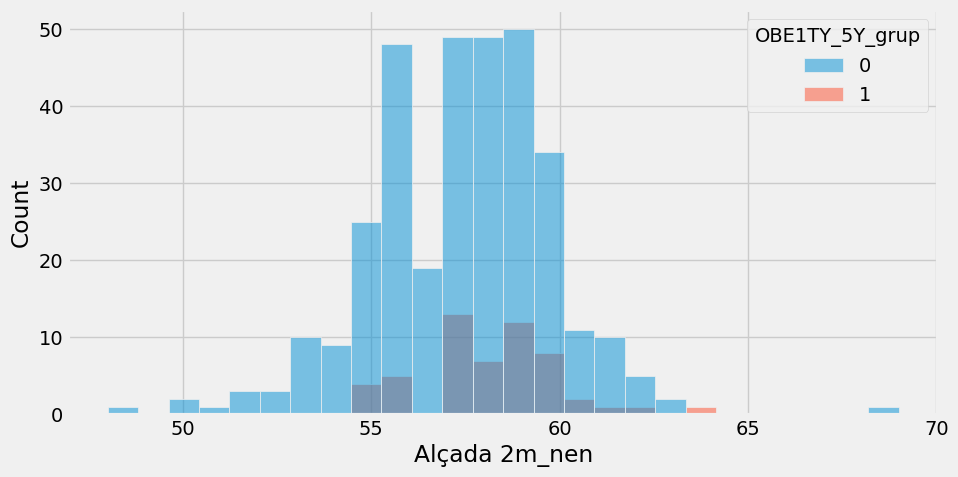

In [116]:
plt.subplots(figsize=(10,5))
sns.histplot(data=data, x='Alçada 2m_nen', hue=target)
plt.show()

In [117]:
print(data['Alçada 2m_nen'].quantile(0.25))
print(data['Alçada 2m_nen'].quantile(0.5))
print(data['Alçada 2m_nen'].quantile(0.75))

56.0
57.8
59.0


Proposo 4 bins:

*   Alçada 2m_nen < 56
*   56<= pes Alçada 2m_nen < 58
*   58<= pes Alçada 2m_nen < 59
*   59<= pes Alçada 2m_nen

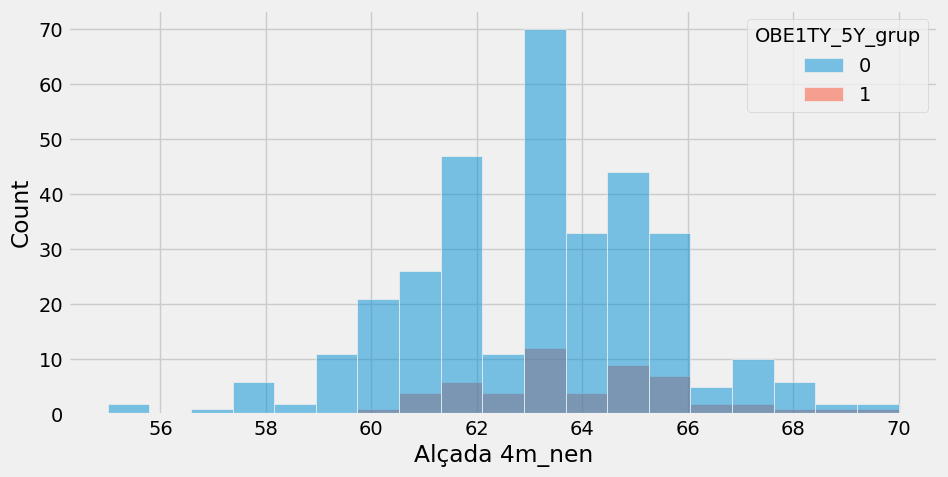

In [117]:
plt.subplots(figsize=(10,5))
sns.histplot(data=data, x='Alçada 4m_nen', hue=target)
plt.show()

In [119]:
print(data['Alçada 4m_nen'].quantile(0.25))
print(data['Alçada 4m_nen'].quantile(0.5))
print(data['Alçada 4m_nen'].quantile(0.75))

62.0
63.0
65.0


Proposo 4 bins:

*   Alçada 4m_nen < 62
*   62<= Alçada 4m_nen <= 63
*   63<  Alçada 4m_nen < 65
*   65<= Alçada 4m_nen

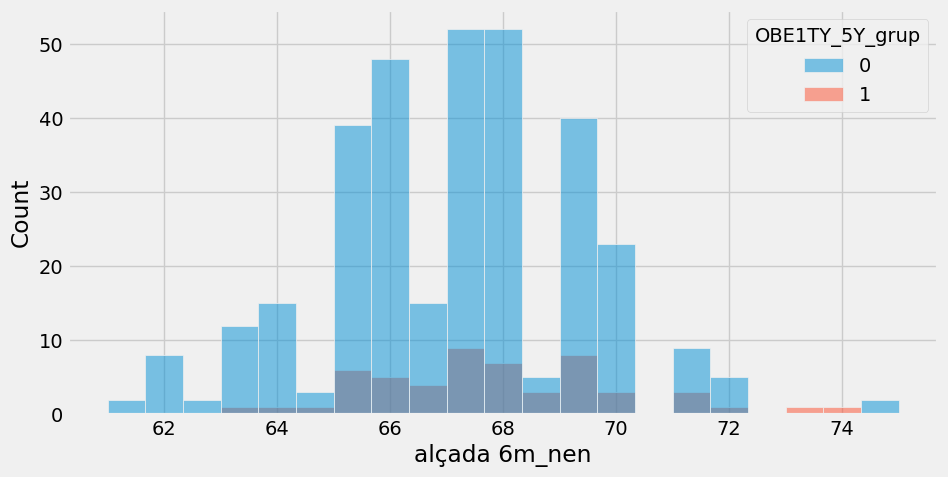

In [118]:
plt.subplots(figsize=(10,5))
sns.histplot(data=data, x='alçada 6m_nen', hue=target)
plt.show()

In [121]:
print(data['alçada 6m_nen'].quantile(0.25))
print(data['alçada 6m_nen'].quantile(0.5))
print(data['alçada 6m_nen'].quantile(0.75))

66.0
67.0
68.5


Proposo 4 bins:

*   alçada 6m_nen < 66
*   66<= pes alçada 6m_nen < 67
*   67<= pes alçada 6m_nen < 68.5
*   68.5<= pes alçada 6m_nen

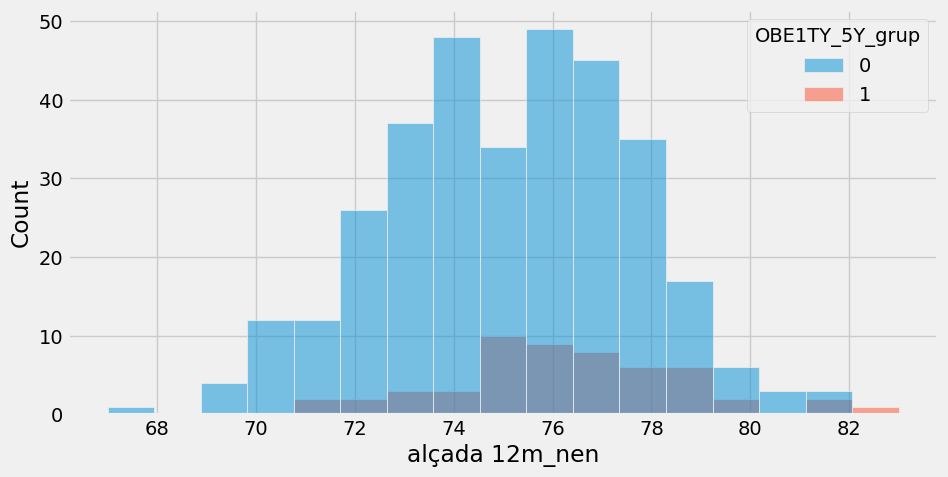

In [119]:
plt.subplots(figsize=(10,5))
sns.histplot(data=data, x='alçada 12m_nen', hue=target)
plt.show()

In [123]:
print(data['alçada 12m_nen'].quantile(0.25))
print(data['alçada 12m_nen'].quantile(0.5))
print(data['alçada 12m_nen'].quantile(0.75))

73.5
75.1
77.0


Proposo 4 bins:

*   alçada 12m_nen < 73.5
*   73.5<= pes alçada 12m_nen < 75
*   75<= pes alçada 12m_nen < 77
*   77<= pes alçada 12m_nen

# Encoding de la discretització

In [124]:
data_d=data.copy()
data_d.shape

(386, 36)

In [125]:
data_d.columns

Index(['AgeM', 'talla_EM', 'tabac_preM', 'alcohol_preM', 'BWM', 'Parity_EM',
       'BMIpre_mare', 'AgeP', 'HeightP', 'BMI_P', 'SmokingP', 'AlcoholP',
       'BWP', 'BMI_2_EM', 'tas_2_EM', 'tad_2_EM', 'BMI_3_EM', 'tas_3_EM',
       'tad_3_EM', 'Obes_gest', 'tabac_gestM', 'Sexe_nen', 'EG', 'weight_B',
       'Height_B', 'pes placenta', 'mesos alim_mat_nen', 'Pes 2m_nen',
       'Alçada 2m_nen', 'Pes 4m_nen', 'Alçada 4m_nen', 'pes 6m_nen',
       'alçada 6m_nen', 'pes 12m_nen', 'alçada 12m_nen', 'OBE1TY_5Y_grup'],
      dtype='object')

El procés d'encoding de les variables serà el següent: 

- A la primera variable *AgeM* els bins pendran els valors {1,2,3,4}, a la segona variable *talla_EM* pendran els valors {11,12,13,14} i així successivament.

D'aquesta manera, el valor del primer digit fa referencia a la variable i el segon, al bin on està contingut el valor.

Per exemple, si **14** és un patró freqüent dels nens obesos, sabem que fa referència a *talla_EM superior a 167*.

In [126]:
def ageM(x):
  age=0
  if x<=25:
    age=1
  elif 25<x<=30:
    age=2
  elif 30<x<=35:
    age=3
  else:
    age=4
  return(age)

In [127]:
data_d['AgeM']=data['AgeM'].map(ageM)
data_d['AgeM'].value_counts()

3    164
2    123
4     64
1     35
Name: AgeM, dtype: int64

In [128]:
def talla_EM(x):
  talla=0
  if x<=159:
    talla=11
  elif 159<x<=163:
    talla=12
  elif 163<x<=167:
    talla=13
  else:
    talla=14
  return(talla)

In [129]:
data_d['talla_EM']=data['talla_EM'].map(talla_EM)
data_d['talla_EM'].value_counts()

11    115
12     95
14     91
13     85
Name: talla_EM, dtype: int64

In [130]:
def tabac_preM(x):
  tabac_preM=0
  if x==0:
    tabac_preM=21
  else:
    tabac_preM=22
  return(tabac_preM)

In [131]:
data_d['tabac_preM']=data['tabac_preM'].map(tabac_preM)
data_d['tabac_preM'].value_counts()

21    293
22     93
Name: tabac_preM, dtype: int64

In [132]:
def alcohol_preM(x):
  alcohol_preM=0
  if x==0:
    alcohol_preM=31
  else:
    alcohol_preM=32
  return(alcohol_preM)

In [133]:
data_d['alcohol_preM']=data['alcohol_preM'].map(alcohol_preM)
data_d['alcohol_preM'].value_counts()

31    285
32    101
Name: alcohol_preM, dtype: int64

In [134]:
def BWM(x):
  BWM=0
  if x==1:
    BWM=41
  elif x==2:
    BWM=42
  elif x==3:
    BWM=43
  else:
    BWM=44
  return(BWM)

In [135]:
data_d['BWM']=data['BWM'].map(BWM)
data_d['BWM'].value_counts()

43    275
42     83
44     18
41     10
Name: BWM, dtype: int64

In [136]:
def Parity_EM(x):
  Parity_EM=0
  if x==1:
    Parity_EM=51
  else:
    Parity_EM=52
  return(Parity_EM)

In [137]:
data_d['Parity_EM']=data['Parity_EM'].map(Parity_EM)
data_d['Parity_EM'].value_counts()

51    196
52    190
Name: Parity_EM, dtype: int64

In [138]:
def BMIpre_mare(x):
  BMIpre_mare=0
  if x<18.5:
    BMIpre_mare=61
  elif 18.5<=x<25:
    BMIpre_mare=62
  elif 25<=x<30:
    BMIpre_mare=63
  else:
    BMIpre_mare=64
  return(BMIpre_mare)

In [139]:
data_d['BMIpre_mare'] = data['BMIpre_mare'].map(BMIpre_mare)
data_d['BMIpre_mare'].value_counts()

62    252
63     80
64     45
61      9
Name: BMIpre_mare, dtype: int64

In [140]:
def AgeP(x):
  age=0
  if x<=30:
    age=71
  elif 30<x<=35:
    age=72
  elif 35<x<=40:
    age=73
  else:
    age=74
  return(age)

In [141]:
data_d['AgeP'] = data['AgeP'].map(AgeP)
data_d['AgeP'].value_counts()

72    164
73    106
71     85
74     31
Name: AgeP, dtype: int64

In [142]:
def HeightP(x):
  HeightP=0
  if x<=170:
    HeightP=81
  elif 170<x<=175:
    HeightP=82
  elif 175<x<=180:
    HeightP=83
  else:
    HeightP=84
  return(HeightP)

In [143]:
data_d['HeightP'] = data['HeightP'].map(HeightP)
data_d['HeightP'].value_counts()

83    124
82    102
84     82
81     78
Name: HeightP, dtype: int64

In [144]:
def BMI_P(x):
  BMI_P=0
  if x<18.5:
    BMI_P=91
  elif 18.5<=x<25:
    BMI_P=92
  elif 25<=x<30:
    BMI_P=93
  else:
    BMI_P=94
  return(BMI_P)

In [145]:
data_d['BMI_P']=data['BMI_P'].map(BMI_P)
data_d['BMI_P'].value_counts()  # No hi ha cap pare amb un BMI_P<18.5

93    205
92    137
94     44
Name: BMI_P, dtype: int64

In [146]:
def SmokingP(x):
  SmokingP=0
  if x==0:
    SmokingP=101
  else:
    SmokingP=102
  return(SmokingP)

In [147]:
data_d['SmokingP']=data['SmokingP'].map(SmokingP)
data_d['SmokingP'].value_counts()

101    262
102    124
Name: SmokingP, dtype: int64

In [148]:
def AlcoholP(x):
  AlcoholP=0
  if x==0:
    AlcoholP=111
  else:
    AlcoholP=112
  return(AlcoholP)

In [149]:
data_d['AlcoholP']=data['AlcoholP'].map(AlcoholP)
data_d['AlcoholP'].value_counts()

112    244
111    142
Name: AlcoholP, dtype: int64

In [150]:
def BWP(x):
  BWP=0
  if x==1:
    BWP=121
  elif x==2:
    BWP=122
  elif x==3:
    BWP=123
  else:
    BWP=124
  return(BWP)

In [151]:
data_d['BWP']=data['BWP'].map(BWP)
data_d['BWP'].value_counts()

123    299
124     47
122     35
121      5
Name: BWP, dtype: int64

In [152]:
def BMI_2_EM(x):
  BMI_2_EM=0
  if x<24:
    BMI_2_EM=131
  elif 24<=x<26:
    BMI_2_EM=132
  elif 26<=x<28.5:
    BMI_2_EM=133
  else:
    BMI_2_EM=134
  return(BMI_2_EM)

In [153]:
data_d['BMI_2_EM']=data['BMI_2_EM'].map(BMI_2_EM)
data_d['BMI_2_EM'].value_counts()#No hi ha cap BMI_2_EM<18.5

132    98
133    97
134    96
131    95
Name: BMI_2_EM, dtype: int64

In [154]:
def tas_2_EM(x):
  tas_2_EM=0
  if x<104:
    tas_2_EM=141
  elif 104<=x<113:
    tas_2_EM=142
  elif 113<=x<121:
    tas_2_EM=143
  else:
    tas_2_EM=144
  return(tas_2_EM)

In [155]:
data_d['tas_2_EM']=data['tas_2_EM'].map(tas_2_EM)
data_d['tas_2_EM'].value_counts()

144    102
142     99
143     97
141     88
Name: tas_2_EM, dtype: int64

In [156]:
def tad_2_EM(x):
  tad_2_EM=0
  if x<60:
    tad_2_EM=151
  elif 60<=x<65:
    tad_2_EM=152
  elif 65<=x<72:
    tad_2_EM=153
  else:
    tad_2_EM=154
  return(tad_2_EM)

In [157]:
data_d['tad_2_EM']=data['tad_2_EM'].map(tad_2_EM)
data_d['tad_2_EM'].value_counts()#No hi ha cap 100<=tad_2_EM

153    108
154    101
152     90
151     87
Name: tad_2_EM, dtype: int64

In [158]:
def BMI_3_EM(x):
  BMI_3_EM=0
  if x<25.5:
    BMI_3_EM=161
  elif 25.5<=x<28:
    BMI_3_EM=162
  elif 28<=x<30.5:
    BMI_3_EM=163
  else:
    BMI_3_EM=164
  return(BMI_3_EM)

In [159]:
data_d['BMI_3_EM']=data['BMI_3_EM'].map(BMI_3_EM)
data_d['BMI_3_EM'].value_counts()#No hi ha cap BMI_3_EM<18.5

161    97
162    97
164    96
163    96
Name: BMI_3_EM, dtype: int64

In [160]:
def tas_3_EM(x):
  tas_3_EM=0
  if x<106:
    tas_3_EM=171
  elif 106<=x<114:
    tas_3_EM=172
  elif 114<=x<123:
    tas_3_EM=173
  else:
    tas_3_EM=174
  return(tas_3_EM)

In [161]:
data_d['tas_3_EM']=data['tas_3_EM'].map(tas_3_EM)
data_d['tas_3_EM'].value_counts()

173    110
174     99
172     93
171     84
Name: tas_3_EM, dtype: int64

In [162]:
def tad_3_EM(x):
  tad_3_EM=0
  if x<64:
    tad_3_EM=181
  elif 64<=x<70:
    tad_3_EM=182
  elif 70<=x<76:
    tad_3_EM=183
  else:
    tad_3_EM=184
  return(tad_3_EM)

In [163]:
data_d['tad_3_EM']=data['tad_3_EM'].map(tad_3_EM)
data_d['tad_3_EM'].value_counts()

184    109
183    102
181     92
182     83
Name: tad_3_EM, dtype: int64

In [164]:
def Obes_gest(x):
  Obes_gest=0
  if x==0:
    Obes_gest=191
  else:
    Obes_gest=192
  return(Obes_gest)

In [165]:
data_d['Obes_gest']=data['Obes_gest'].map(Obes_gest)
data_d['Obes_gest'].value_counts()

191    322
192     64
Name: Obes_gest, dtype: int64

In [166]:
def tabac_gestM(x):
  tabac_gestM=0
  if x==0:
    tabac_gestM=201
  else:
    tabac_gestM=202
  return(tabac_gestM)

In [167]:
data_d['tabac_gestM']=data['tabac_gestM'].map(tabac_gestM)
data_d['tabac_gestM'].value_counts()

201    329
202     57
Name: tabac_gestM, dtype: int64

In [168]:
def Sexe_nen(x):
  Sexe_nen=0
  if x==1:
    Sexe_nen=211
  else:
    Sexe_nen=212
  return(Sexe_nen)

In [169]:
data_d['Sexe_nen']=data['Sexe_nen'].map(Sexe_nen)
data_d['Sexe_nen'].value_counts()

211    203
212    183
Name: Sexe_nen, dtype: int64

In [170]:
def EG(x):
  EG=0
  if x<=36:
    EG=221
  elif 36<x<=39:
    EG=222
  elif 39<x<=40:
    EG=223
  else:
    EG=224
  return(EG)

In [171]:
data_d['EG']=data['EG'].map(EG)
data_d['EG'].value_counts()

222    166
223    112
224     94
221     14
Name: EG, dtype: int64

In [172]:
def weight_B(x):
  weight_B=0
  if x<=3000:
    weight_B=231
  elif 3000<x<=3500:
    weight_B=232
  elif 3500<x<=4000:
    weight_B=233
  else:
    weight_B=234
  return(weight_B)

In [173]:
data_d['weight_B']=data['weight_B'].map(weight_B)
data_d['weight_B'].value_counts()

232    189
233     90
231     85
234     22
Name: weight_B, dtype: int64

In [174]:
def Height_B(x):
  Height_B=0
  if x<48:
    Height_B=241
  elif 48<=x<50:
    Height_B=242
  elif 50<=x<51:
    Height_B=243
  else:
    Height_B=244
  return(Height_B)

In [175]:
data_d['Height_B']=data['Height_B'].map(Height_B)
data_d['Height_B'].value_counts()

242    128
244    106
243     95
241     57
Name: Height_B, dtype: int64

In [176]:
def placenta(x):
  placenta=0
  if x<500:
    placenta=251
  elif 500<=x<580:
    placenta=252
  elif 580<=x<660:
    placenta=253
  else:
    placenta=254
  return(placenta)

In [177]:
data_d['pes placenta']=data['pes placenta'].map(placenta)
data_d['pes placenta'].value_counts()

252    111
254     98
253     95
251     82
Name: pes placenta, dtype: int64

In [178]:
def alimentacio(x):
  alimentacio=0
  if x<4:
    alimentacio=261
  elif 4<=x<7:
    alimentacio=262
  elif x==7:
    alimentacio=263
  else:
    alimentacio=264
  return(alimentacio)

In [179]:
data_d['mesos alim_mat_nen']=data['mesos alim_mat_nen'].map(alimentacio)
data_d['mesos alim_mat_nen'].value_counts()

263    128
264     95
261     89
262     74
Name: mesos alim_mat_nen, dtype: int64

In [180]:
def pes2m(x):
  pes2m=0
  if x<4900:
    pes2m=271
  elif 4900<=x<5300:
    pes2m=272
  elif 5300<=x<5650:
    pes2m=273
  else:
    pes2m=274
  return(pes2m)

In [181]:
data_d['Pes 2m_nen']=data['Pes 2m_nen'].map(pes2m)
data_d['Pes 2m_nen'].value_counts()

272    99
274    97
271    97
273    93
Name: Pes 2m_nen, dtype: int64

In [182]:
def alt2m(x):
  alt2m=0
  if x<56:
    alt2m=281
  elif 56<=x<58:
    alt2m=282
  elif 58<=x<59:
    alt2m=283
  else:
    alt2m=284
  return(alt2m)

In [183]:
data_d['Alçada 2m_nen']=data['Alçada 2m_nen'].map(alt2m)
data_d['Alçada 2m_nen'].value_counts()

284    117
282    116
281     78
283     75
Name: Alçada 2m_nen, dtype: int64

In [184]:
def pes4m(x):
  pes4m=0
  if x<6200:
    pes4m=291
  elif 6200<=x<6750:
    pes4m=292
  elif 6750<=x<7300:
    pes4m=293
  else:
    pes4m=294
  return(pes4m)

In [185]:
data_d['Pes 4m_nen']=data['Pes 4m_nen'].map(pes4m)
data_d['Pes 4m_nen'].value_counts()

292    104
291    101
294     92
293     89
Name: Pes 4m_nen, dtype: int64

In [186]:
def alt4m(x):
  alt4m=0
  if x<62:
    alt4m=301
  elif 62<=x<=63:
    alt4m=302
  elif 63<x<65:
    alt4m=303
  else:
    alt4m=304
  return(alt4m)

In [187]:
data_d['Alçada 4m_nen']=data['Alçada 4m_nen'].map(alt4m)
data_d['Alçada 4m_nen'].value_counts()

302    110
304    107
301     86
303     83
Name: Alçada 4m_nen, dtype: int64

In [188]:
def pes6m(x):
  pes6m=0
  if x<7100:
    pes6m=311
  elif 7100<=x<7700:
    pes6m=312
  elif 7700<=x<8350:
    pes6m=313
  else:
    pes6m=314
  return(pes6m)

In [189]:
data_d['pes 6m_nen']=data['pes 6m_nen'].map(pes6m)
data_d['pes 6m_nen'].value_counts()

311    99
312    97
314    97
313    93
Name: pes 6m_nen, dtype: int64

In [190]:
def alt6m(x):
  alt6m=0
  if x<66:
    alt6m=321
  elif 66<=x<67:
    alt6m=322
  elif 67<=x<68.5:
    alt6m=323
  else:
    alt6m=324
  return(alt6m)

In [191]:
data_d['alçada 6m_nen']=data['alçada 6m_nen'].map(alt6m)
data_d['alçada 6m_nen'].value_counts()

323    120
324    104
321     92
322     70
Name: alçada 6m_nen, dtype: int64

In [192]:
def pes12m(x):
  pes12m=0
  if x<8925:
    pes12m=331
  elif 8925<=x<9650:
    pes12m=332
  elif 9650<=x<10325:
    pes12m=333
  else:
    pes12m=334
  return(pes12m)

In [193]:
data_d['pes 12m_nen']=data['pes 12m_nen'].map(pes12m)
data_d['pes 12m_nen'].value_counts()

334    100
331     98
332     95
333     93
Name: pes 12m_nen, dtype: int64

In [194]:
def alt12m(x):
  alt12m=0
  if x<73.5:
    alt12m=341
  elif 73.5<=x<75:
    alt12m=342
  elif 75<=x<77:
    alt12m=343
  else:
    alt12m=344
  return(alt12m)

In [195]:
data_d['alçada 12m_nen']=data['alçada 12m_nen'].map(alt12m)
data_d['alçada 12m_nen'].value_counts()

344    123
343    111
341     88
342     64
Name: alçada 12m_nen, dtype: int64

In [196]:
data_d.head()

,AgeM,talla_EM,tabac_preM,alcohol_preM,BWM,Parity_EM,BMIpre_mare,AgeP,HeightP,BMI_P,...,mesos alim_mat_nen,Pes 2m_nen,Alçada 2m_nen,Pes 4m_nen,Alçada 4m_nen,pes 6m_nen,alçada 6m_nen,pes 12m_nen,alçada 12m_nen,OBE1TY_5Y_grup
0,3,12,21,31,43,51,63,74,83,93,...,264,274,282,293,302,312,323,333,341,1
1,1,13,22,31,42,51,62,71,82,92,...,261,272,282,292,301,312,322,332,342,0
2,2,14,21,31,43,51,63,74,83,93,...,261,272,284,293,304,313,324,333,344,0
3,4,12,21,31,43,52,62,74,83,94,...,264,272,283,293,303,313,323,334,344,1
4,3,13,21,31,43,51,62,73,84,92,...,262,272,283,292,302,312,323,332,342,0


In [ ]:
data_d.to_csv('output_d.csv', index=False)

# Export .txt SPMF

In [198]:
#Dataset nens obesos
data_d_obese=data_d[data_d['OBE1TY_5Y_grup']==1]
data_d_obese.shape

(54, 36)

In [199]:
#Dataset nens sans
data_d_notobese=data_d[data_d['OBE1TY_5Y_grup']==0]
data_d_notobese.shape

(332, 36)

In [ ]:
data_d_obese.drop('OBE1TY_5Y_grup',axis=1,inplace=True)
data_d_notobese.drop('OBE1TY_5Y_grup',axis=1,inplace=True)

In [201]:
data_d_obese.to_csv('obese.txt', sep=' ',header=False, index=False)
data_d_notobese.to_csv('notobese.txt', sep=' ',header=False, index=False)

In [388]:
# Read the text file
with open('obese.txt', 'r') as file:
    rows = file.readlines()

# Modify each row by appending -2
modified_rows = [row.strip() + ' -2' for row in rows]

# Write the modified rows to a new file
with open('obese_d.txt', 'w') as file:
    file.write('\n'.join(modified_rows))

In [389]:
# Read the text file
with open('notobese.txt', 'r') as file:
    rows = file.readlines()

# Modify each row by appending -2
modified_rows = [row.strip() + ' -2' for row in rows]

# Write the modified rows to a new file
with open('notobese_d.txt', 'w') as file:
    file.write('\n'.join(modified_rows))